# 💼 Business Strategy: Garment Order & Costing Analysis

## 🎯 Objective:
To extract key insights from the garment order costing dataset for strategic

* decision-making. This includes:

* Evaluating buyer performance

* Understanding style profitability

* Analyzing cost components (Fabric, Trims, CM, etc.)

* Identifying efficiency or margin leakages

* Supporting merchandising and sourcing decisions

## 💡 Business Questions to Answer:

* Which buyers give the highest volume or margin?

* Which styles have the best profitability (CM % or gross margin)?

* How are material and other costs distributed?

* Are there inefficiencies in styles (low efficiency or high commission)?

* How does costing vary across season, style, or merchandiser?

# Load Required Python Libraries

In [4]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display and formatting
from IPython.display import display

# For working with warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Analytical Process

## 📥 1. Data Loading & info

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Office_Analyst_works/Datasets/CostingMISReport20-25.csv")
df.sample(8)

Buyer               SC/LC No  Style Code  \
1554       Bestseller          Bestseller 02    13215907   
993               H&M  MGSL/H&M-Mens DBL-S.0     1234151   
407   EL CORTE INGLES      ECI-SS24 AND AW24  W24644H914   
364   EL CORTE INGLES         15006560000953    42J4301A   
511   EL CORTE INGLES               ECI-AW25    57J4301B   
99    EL CORTE INGLES         15006560000958    47J4305B   
1384              TMS           DC HK1121605     3410508   
1070              H&M  MGSL/H&M-Mens DBL-S.0     1242812   

                   Style Name              Season  Pcs/set   Order Qty   FOB  \
1554    NKFVINAYA SS PLAYSUIT  MAIN 3 SUMMER 2025        1   15,327.00  5.43   
993   ADRIEN REGULAR LS SHIRT              1-2025        1  115,346.00  3.46   
407                       NaN                 NaN        1    4,000.00  6.31   
364                  42J4301A                AW24        1      125.00  4.51   
511                       NaN                 NaN        1    1,100.00  4.40   
99                        NaN                AW24        1    1,200.00  4.31   
1384                   345394                 NaN        1    9,372.00  2.87   
1070  FRAME SLIM 2.0 TD SHIRT              0-2024        1  290,797.00  3.09   

        CM   CM (%)  ...  Fabric/Yarn Cost  Trims Cost  Material Cost  \
1554  1.50  27.64%   ...              2.06        1.25           3.31   
993   1.10  31.79%   ...              2.00        0.34           2.33   
407   2.00  31.70%   ...              2.45        1.66           4.11   
364   1.70  37.71%   ...              1.34        1.27           2.61   
511   1.65  37.50%   ...              1.26        1.29           2.55   
99    1.70  39.44%   ...              1.29        1.12           2.41   
1384  1.50  52.26%   ...              0.00        1.00           1.00   
1070  1.20  38.78%   ...              1.47        0.40           1.87   

      Material (%)  Other Cost  Commercial Cost       %  Commission Cost  \
1554       60.97%         0.00             0.11  2.03%              0.26   
993        67.34%         0.00             0.03  0.87%              0.00   
407        65.13%         0.00             0.20  3.17%              0.00   
364        57.85%         0.00             0.20  4.44%              0.00   
511        57.95%         0.00             0.20  4.55%              0.00   
99         55.92%         0.00             0.20  4.64%              0.00   
1384       34.84%         0.15             0.05  1.74%              0.00   
1070       60.57%         0.00             0.02  0.65%              0.00   

         %.1  Merchandiser  
1554  5.00%          Anwar  
993   0.00%         Fakrul  
407   0.00%      Nooruddin  
364   0.00%      Nooruddin  
511   0.00%      Nooruddin  
99    0.00%      Nooruddin  
1384  0.00%          Nipun  
1070  0.00%         Fakrul  

[8 rows x 25 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buyer             1862 non-null   object 
 1   SC/LC No          1862 non-null   object 
 2   Style Code        1862 non-null   object 
 3   Style Name        992 non-null    object 
 4   Season            906 non-null    object 
 5   Pcs/set           1862 non-null   int64  
 6   Order Qty         1862 non-null   object 
 7   FOB               1862 non-null   float64
 8   CM                1862 non-null   float64
 9   CM (%)            1862 non-null   object 
 10  SMV               418 non-null    float64
 11  EPM               1862 non-null   float64
 12  CostPerMinute     410 non-null    float64
 13  Eficience         372 non-null    float64
 14  EficenceCPM       372 non-null    float64
 15  Fabric/Yarn Cost  1862 non-null   float64
 16  Trims Cost        1862 non-null   float64


In [7]:
df.describe()

Pcs/set          FOB           CM         SMV          EPM  \
count  1862.000000  1862.000000  1862.000000  418.000000  1862.000000   
mean      1.052632     6.490902     1.780430   20.470622     0.018330   
std       0.393964     3.336318     0.884351    5.333033     0.037331   
min       1.000000     1.660000    -2.100000    7.000000     0.000000   
25%       1.000000     4.350000     1.250000   18.000000     0.000000   
50%       1.000000     5.620000     1.500000   20.000000     0.000000   
75%       1.000000     7.695000     2.000000   21.000000     0.000000   
max      10.000000    30.060000     8.000000   91.000000     0.220000   

       CostPerMinute   Eficience  EficenceCPM  Fabric/Yarn Cost   Trims Cost  \
count     410.000000  372.000000   372.000000        1862.00000  1862.000000   
mean        0.044634   36.663978     0.041720           3.26073     1.055575   
std         0.031746   30.057940     0.046491           2.25254     0.719941   
min         0.000000    0.000000     0.000000           0.00000     0.000000   
25%         0.000000    0.000000     0.000000           1.85000     0.600000   
50%         0.060000   59.000000     0.000000           2.70000     1.000000   
75%         0.060000   60.000000     0.080000           3.91750     1.280000   
max         0.210000   90.000000     0.330000          19.25000     6.640000   

       Material Cost   Other Cost  Commercial Cost  Commission Cost  
count    1862.000000  1862.000000      1862.000000      1862.000000  
mean        4.316316     0.126842         0.102836         0.047734  
std         2.479391     0.271781         0.115732         0.115278  
min         0.000000     0.000000         0.000000         0.000000  
25%         2.762500     0.000000         0.000000         0.000000  
50%         3.675000     0.000000         0.070000         0.000000  
75%         5.150000     0.150000         0.200000         0.000000  
max        21.100000     2.000000         1.000000         0.670000

In [8]:
# Display the first few rows of the DataFrame
display(df.head())

Buyer                 SC/LC No Style Code                  Style Name  \
0  Bestseller     Bestseller PIECES/ 2   17154372       PCSALMINA 2/4 TOP WVN   
1         H&M   MGSL/H&M-Mens DBL-S.02    1257590  BERT SLIM CA STRETCH SHIRT   
2         H&M    MGSL/H&M-Mens DBL-S.0    1257590  BERT SLIM CA STRETCH SHIRT   
3        NEXT  MGNSL/VOGUE SOURCING/06     N38774                KAFTAN DRESS   
4        NEXT             DC RMR470325     N38774                KAFTAN DRESS   

              Season  Pcs/set   Order Qty    FOB    CM   CM (%)  ...  \
0  COL 4 SPRING 2025        1    4,719.00   6.41  1.78  27.79%   ...   
1             2-2025        1  240,014.00   4.34  1.25  28.80%   ...   
2             2-2025        1   12,201.00   4.34  1.25  28.80%   ...   
3                NaN        1    1,999.00  14.84  2.00  13.48%   ...   
4                NaN        1    1,999.00  14.84  2.00  13.48%   ...   

   Fabric/Yarn Cost  Trims Cost  Material Cost  Material (%)  Other Cost  \
0              4.13        0.50           4.63       72.21%         0.00   
1              2.72        0.37           3.09       71.20%         0.00   
2              2.72        0.37           3.09       71.20%         0.00   
3             10.22        0.96          11.18       75.30%         0.19   
4             10.22        0.96          11.18       75.30%         0.19   

   Commercial Cost       %  Commission Cost     %.1  Merchandiser  
0             0.00  0.00%               0.0  0.00%            NaN  
1             0.00  0.00%               0.0  0.00%            NaN  
2             0.00  0.00%               0.0  0.00%            NaN  
3             0.22  1.48%               0.5  3.50%         Mahbub  
4             0.22  1.48%               0.5  3.50%         Mahbub  

[5 rows x 25 columns]

In [9]:
# Display the last few rows of the DataFrame
display(df.tail())


Buyer       SC/LC No Style Code                Style Name  \
1857  Best Seller  Bestseller 02   13243686     NBMHUGO SS LOOSE BODY   
1858  Best Seller  Bestseller 02   13243715    NMMHUGO SS LOOSE SHIRT   
1859  Best Seller  Bestseller 02   13243746  NMMJESPER SS LOOSE SHIRT   
1860  Best Seller  Bestseller 02   13243739      NMMJESPER SHORTS LIL   
1861  Best Seller  Bestseller 02   13243733     NBMJESPER LOOSE SHORT   

                  Season  Pcs/set Order Qty   FOB    CM   CM (%)  ...  \
1857  MAIN 3 SUMMER 2025        1  1,020.00  4.10  1.50  36.63%   ...   
1858  MAIN 3 SUMMER 2025        1  1,464.00  4.35  1.32  30.37%   ...   
1859  MAIN 3 SUMMER 2025        1  1,560.00  5.25  1.32  25.15%   ...   
1860  MAIN 3 SUMMER 2025        1  1,560.00  5.20  1.20  23.10%   ...   
1861  MAIN 3 SUMMER 2025        1  1,992.00  4.90  1.50  30.63%   ...   

      Fabric/Yarn Cost  Trims Cost  Material Cost  Material (%)  Other Cost  \
1857              1.32        0.60           1.92       46.89%         0.24   
1858              1.68        0.60           2.28       52.45%         0.25   
1859              2.50        0.84           3.34       63.61%         0.18   
1860              2.43        0.99           3.42       65.79%         0.18   
1861              1.96        0.94           2.90       59.30%         0.17   

      Commercial Cost       %  Commission Cost     %.1  Merchandiser  
1857             0.06  1.47%              0.20  5.00%         Sabbir  
1858             0.10  2.30%              0.21  5.00%         Sabbir  
1859             0.06  1.14%              0.25  5.00%         Sabbir  
1860             0.05  0.96%              0.25  5.00%         Sabbir  
1861             0.00  0.00%              0.23  5.00%         Sabbir  

[5 rows x 25 columns]

In [10]:
# Get the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Number of rows: 1862
Number of columns: 25


In [11]:
# Check for missing values in each column
print("\nMissing values per column:")
display(df.isnull().sum())


Missing values per column:


Buyer                  0
SC/LC No               0
Style Code             0
Style Name           870
Season               956
Pcs/set                0
Order Qty              0
FOB                    0
CM                     0
CM (%)                 0
SMV                 1444
EPM                    0
CostPerMinute       1452
Eficience           1490
EficenceCPM         1490
Fabric/Yarn Cost       0
Trims Cost             0
Material Cost          0
Material (%)           0
Other Cost             0
Commercial Cost        0
%                      0
Commission Cost        0
%.1                    0
Merchandiser           3
dtype: int64

In [45]:
# Get the number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 1862
Number of columns: 27


In [12]:
# Get data types of each column
print("\nData types of each column:")
display(df.dtypes)


Data types of each column:


Buyer                object
SC/LC No             object
Style Code           object
Style Name           object
Season               object
Pcs/set               int64
Order Qty            object
FOB                 float64
CM                  float64
CM (%)               object
SMV                 float64
EPM                 float64
CostPerMinute       float64
Eficience           float64
EficenceCPM         float64
Fabric/Yarn Cost    float64
Trims Cost          float64
Material Cost       float64
Material (%)         object
Other Cost          float64
Commercial Cost     float64
%                    object
Commission Cost     float64
%.1                  object
Merchandiser         object
dtype: object

In [14]:
# Display unique values for specific columns (replace 'column_name' with actual column name)
# This is useful for categorical columns to see the different categories
print("\nUnique values for 'column_name':")
print(df['Buyer'].unique())


Unique values for 'column_name':
['Bestseller' 'H&M' 'NEXT' 'EL CORTE INGLES' 'Promoset SA'
 'Ocean Trading  and  Logis??cs Pty Ltd'
 'Ocean Trading & Logistics Pty Ltd' 'PEPE JEANS SL' 'H WEAR LIMITED'
 'HAGGAR CLOTHING CO' 'Primark' 'DK Company' 'DK Company Vejle A/S'
 'NITEX PTE LTD.' 'River Island Clothing Co.LTD.'
 'Aldi Sourcing Asia Limited' 'River Island' 'TEXLINE ASSOCIATE PTE LTD'
 'Tex Group Ltd.' 'RIVER ISLAND CLOTHING CO. LTD.' 'Springfield' 'TMS'
 'PEEK AND CLOPPENBURG KG' 'LOJAS RENNER' 'Street One'
 'TMS Fashion (HK) Ltd.' 'Pepe Jeans' 'TMS FASHION (H.K) LTD'
 'A.M.London Fashion Ltd' 'Choice Discount Stores LTD'
 'Crew Clothing Company Ltd.' 'Best Seller' 'THE IMPETUS GALLERY LTD'
 'HAGGAR CLOTHING CO.' 'Colony Brands, INC' 'ZXY']


In [15]:
# Calculate the memory usage of the DataFrame
print("\nMemory usage of the DataFrame:")
print(df.memory_usage(deep=True))



Memory usage of the DataFrame:
Index                  132
Buyer               128902
SC/LC No            135481
Style Code          122429
Style Name           98307
Season               90264
Pcs/set              14896
Order Qty           120654
FOB                  14896
CM                   14896
CM (%)              119163
SMV                  14896
EPM                  14896
CostPerMinute        14896
Eficience            14896
EficenceCPM          14896
Fabric/Yarn Cost     14896
Trims Cost           14896
Material Cost        14896
Material (%)        119163
Other Cost           14896
Commercial Cost      14896
%                   117317
Commission Cost      14896
%.1                 117306
Merchandiser        118570
dtype: int64


In [16]:
# Examine the index of the DataFrame
print("\nDataFrame index:")
print(df.index)


DataFrame index:
RangeIndex(start=0, stop=1862, step=1)


In [17]:
# Get column names
print("\nColumn Names:")
df.columns



Column Names:


Index(['Buyer', 'SC/LC No', 'Style Code', 'Style Name', 'Season', 'Pcs/set',
       'Order Qty', 'FOB', 'CM', 'CM (%)', 'SMV', 'EPM', 'CostPerMinute',
       'Eficience', 'EficenceCPM', 'Fabric/Yarn Cost', 'Trims Cost',
       'Material Cost', 'Material (%)', 'Other Cost', 'Commercial Cost', '%',
       'Commission Cost', '%.1', 'Merchandiser'],
      dtype='object')

##  2. Data Cleaning

In [35]:
import pandas as pd

print("Data Info:")
df.info()

# Rename columns (if needed)
df.columns = [col.strip().replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]

# Convert percentages from strings to floats (if columns exist)
percent_cols = ['CM_%', 'Material_%', 'Commission_%']
for col in percent_cols:
    if col in df.columns:
        df[col] = df[col].replace('%', '', regex=True)
        df[col] = df[col].astype(str).str.replace('(', '-', regex=False).str.replace(')', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Clean numeric columns (handle negative values in parentheses)
numeric_cols = ['Order_Qty', 'FOB', 'CM', 'Fabric/Yarn_Cost', 'Trims_Cost', 'Material_Cost',
                'Other_Cost', 'Commercial_Cost', 'Commission_Cost']

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('(', '-', regex=False).str.replace(')', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing numeric values with 0
df.fillna(0, inplace=True)


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buyer             1862 non-null   object 
 1   SC/LC_No          1862 non-null   object 
 2   Style_Code        1862 non-null   object 
 3   Style_Name        1862 non-null   object 
 4   Season            1862 non-null   object 
 5   Pcs/set           1862 non-null   int64  
 6   Order_Qty         1862 non-null   object 
 7   FOB               1862 non-null   float64
 8   CM                1862 non-null   float64
 9   CM_%              1862 non-null   float64
 10  SMV               1862 non-null   float64
 11  EPM               1862 non-null   float64
 12  CostPerMinute     1862 non-null   float64
 13  Eficience         1862 non-null   float64
 14  EficenceCPM       1862 non-null   float64
 15  Fabric/Yarn_Cost  1862 non-null   float64
 16  Trims_Cost        1862 non-null

In [36]:
# Fill missing numeric values with 0
df.fillna(0, inplace=True)

In [21]:
df.sample(10)

Buyer                SC/LC No  \
1520               Bestseller          Best Seller 01   
1240          EL CORTE INGLES       MG-Hipercor BA018   
1344  PEEK AND CLOPPENBURG KG            DC HK1108231   
1151          EL CORTE INGLES       MG-Hipercor BA018   
1326  PEEK AND CLOPPENBURG KG              MGNSL-AW26   
1555               Bestseller           Bestseller 02   
305           EL CORTE INGLES       ECI-SS24 AND AW24   
1263          EL CORTE INGLES       MG-Hipercor BA018   
1403            PEPE JEANS SL  MG-Pepe Jeans Denim-24   
495           EL CORTE INGLES           CESITF2500009   

                                   Style Code                Style Name  \
1520                                 13234411       NBFNOLA FLORAL CORD   
1240                               W24114H701                         0   
1344                       ANNE- LINEN/BW MIX        ANNE- LINEN/BW MIX   
1151                                C52N5407A                         0   
1326  Lotta Streifen - ML Stickerrei Streifen                         0   
1555                                 13215908  NKFVINAYA SKIRT FFF NOOS   
305                                W24BOCBICO                         0   
1263                               S25801H101                         0   
1403                              PM307489HS8                    CARSON   
495                                  GC25WT20                         0   

                  Season  Pcs/set  Order Qty    FOB    CM   CM (%)  ...  \
1520      COLL(#1-#6)'24        1   2,868.00   5.05  1.50  29.70%   ...   
1240                   0        1  10,002.00   4.45  0.80  17.96%   ...   
1344                   0        1   3,300.00   8.59  1.15  13.38%   ...   
1151                   0        1     750.00   6.90  1.80  26.08%   ...   
1326                   0        1   1,950.00   2.93  1.93  65.87%   ...   
1555  MAIN 3 SUMMER 2025        1   3,669.00   5.52  1.30  23.55%   ...   
305                 AW24        1   1,000.00   3.46  1.20  34.71%   ...   
1263                   0        1   1,400.00   8.15  2.50  30.69%   ...   
1403                   0        1     546.00  13.50  4.19  31.04%   ...   
495                    0        1   4,000.00   6.11  1.90  31.12%   ...   

      Fabric/Yarn Cost  Trims Cost  Material Cost  Material (%)  Other Cost  \
1520              2.11        0.70           2.81       55.63%         0.22   
1240              2.24        1.41           3.65       82.04%         0.00   
1344              6.48        0.85           7.33       85.34%         0.06   
1151              3.74        1.05           4.79       69.43%         0.31   
1326              0.00        0.90           0.90       30.72%         0.06   
1555              2.57        1.00           3.57       64.63%         0.00   
305               1.02        1.04           2.06       59.51%         0.00   
1263              4.40        1.25           5.65       69.31%         0.00   
1403              5.70        2.20           7.90       58.52%         1.25   
495               2.63        1.43           4.06       66.42%         0.00   

      Commercial Cost       %  Commission Cost     %.1  Merchandiser  
1520             0.05  0.99%              0.24  5.00%         Kuasha  
1240             0.00  0.00%              0.00  0.00%           Babu  
1344             0.05  0.58%              0.00  0.00%          Nipun  
1151             0.00  0.00%              0.00  0.00%           Babu  
1326             0.04  1.37%              0.00  0.00%          Nipun  
1555             0.10  1.81%              0.26  5.00%          Anwar  
305              0.20  5.78%              0.00  0.00%      Nooruddin  
1263             0.00  0.00%              0.00  0.00%           Babu  
1403             0.15  1.11%              0.00  0.00%          Nipun  
495              0.15  2.46%              0.00  0.00%      Nooruddin  

[10 rows x 25 columns]

In [39]:
df.columns = [col.strip().replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]


In [40]:
# Gross Margin Calculation
df['Total_Cost'] = (
    df['CM'] +
    df['Material_Cost'] +
    df['Other_Cost'] +
    df['Commercial_Cost'] +
    df['Commission_Cost']
)

df['Gross_Margin'] = df['FOB'] - df['Total_Cost']

# Sort by highest margin
df_sorted = df.sort_values(by='Gross_Margin', ascending=False)

# Display selected columns (also using underscores now)
display(df_sorted[['Buyer', 'Style_Name', 'FOB', 'Total_Cost', 'Gross_Margin']].head())


Buyer          Style_Name   FOB  Total_Cost  \
1454  Choice Discount Stores LTD              Q69758  5.32       -2.10   
1455  Choice Discount Stores LTD              C73845  4.31       -1.09   
1452  Choice Discount Stores LTD              C83697  4.31       -1.09   
982                          H&M  SVERRE WD SET 3PCS  8.66        4.57   
1453  Choice Discount Stores LTD              D94548  2.79       -1.00   

      Gross_Margin  
1454          7.42  
1455          5.40  
1452          5.40  
982           4.09  
1453          3.79

In [41]:
#  Grouping & Aggregation

# Buyer Summary
buyer_summary = df.groupby('Buyer').agg({
    'Order_Qty': 'sum',
    'FOB': 'mean',
    'CM_%': 'mean',
    'Gross_Margin': 'mean'
}).sort_values(by='Order_Qty', ascending=False)

print("📊 Buyer Summary:")
display(buyer_summary)


📊 Buyer Summary:


Order_Qty        FOB       CM_%  \
Buyer                                                                    
EL CORTE INGLES                          43691.0   5.933267  28.527896   
Bestseller                               40197.0   5.395592  28.355071   
DK Company                               23413.0  10.167551  30.765714   
PEPE JEANS SL                            13908.0  12.304386  25.970877   
NEXT                                     11900.0  10.624950  20.563168   
NITEX PTE LTD.                            9554.0   9.691000  28.567000   
PEEK AND CLOPPENBURG KG                   8006.0   6.550625  32.416250   
Pepe Jeans                                6803.0  12.710588  28.434118   
H&M                                       6313.0   3.764817  33.756492   
River Island                              5241.0   9.042857  35.733810   
HAGGAR CLOTHING CO                        4296.0   5.804000  28.659600   
Colony Brands, INC                        3780.0  18.962500  30.198333   
THE IMPETUS GALLERY LTD                   3270.0   6.114286  36.007857   
RIVER ISLAND CLOTHING CO. LTD.            2550.0   7.193333  26.130000   
River Island Clothing Co.LTD.             1500.0  11.135000  32.395000   
Choice Discount Stores LTD                1378.0   3.954286 -17.984286   
HAGGAR CLOTHING CO.                       1357.0   7.202692  33.695385   
A.M.London Fashion Ltd                     843.0   8.395000  18.345000   
Ocean Trading & Logistics Pty Ltd          830.0   6.700000  23.880000   
Street One                                 809.0   6.171111  31.686667   
ZXY                                        660.0   5.755294  17.182941   
Crew Clothing Company Ltd.                 650.0   7.310000  27.380000   
DK Company Vejle A/S                       500.0   8.580000  33.665000   
Primark                                    220.0   4.398788  27.263333   
Best Seller                                  0.0   4.421818  29.318182   
Aldi Sourcing Asia Limited                   0.0   4.110000  29.920000   
H WEAR LIMITED                               0.0   2.318235  70.498235   
LOJAS RENNER                                 0.0   5.590000  19.793750   
Ocean Trading  and  Logis??cs Pty Ltd        0.0   6.710000  26.090000   
Promoset SA                                  0.0   4.817500  33.167500   
Springfield                                  0.0   5.029057  26.292075   
TEXLINE ASSOCIATE PTE LTD                    0.0   7.150000  25.870000   
TMS                                          0.0   6.125833  34.258333   
TMS FASHION (H.K) LTD                        0.0   5.700000  31.600000   
TMS Fashion (HK) Ltd.                        0.0   6.380000  36.773750   
Tex Group Ltd.                               0.0   5.886667  36.696667   

                                       Gross_Margin  
Buyer                                                
EL CORTE INGLES                        1.232673e-02  
Bestseller                             2.054028e-01  
DK Company                             4.785714e-02  
PEPE JEANS SL                          1.542105e-01  
NEXT                                   8.814851e-01  
NITEX PTE LTD.                        -1.554312e-16  
PEEK AND CLOPPENBURG KG               -2.775558e-17  
Pepe Jeans                             1.411765e-01  
H&M                                    7.403141e-02  
River Island                           4.229421e-16  
HAGGAR CLOTHING CO                     9.380000e-02  
Colony Brands, INC                     5.921189e-16  
THE IMPETUS GALLERY LTD                1.571429e-02  
RIVER ISLAND CLOTHING CO. LTD.         5.921189e-16  
River Island Clothing Co.LTD.          4.440892e-16  
Choice Discount Stores LTD             4.708571e+00  
HAGGAR CLOTHING CO.                   -1.153846e-03  
A.M.London Fashion Ltd                -5.000000e-03  
Ocean Trading & Logistics Pty Ltd      0.000000e+00  
Street One                             1.111111e-02  
ZXY                                   

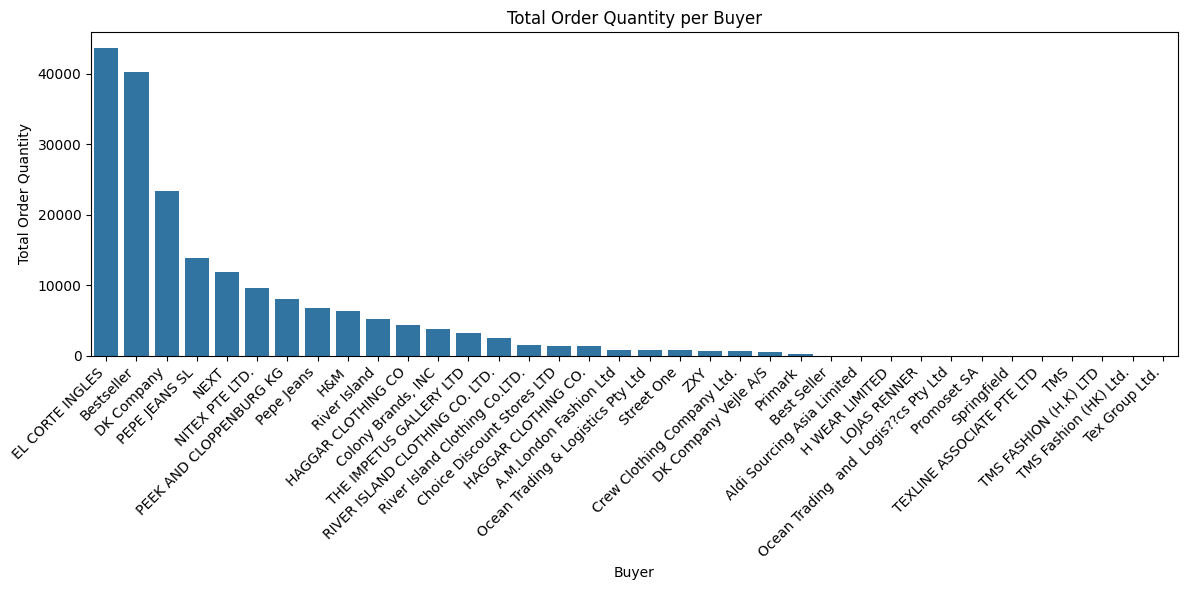

In [46]:
# data exploration

# Plotting Order Quantity by Buyer
plt.figure(figsize=(12, 6))
sns.barplot(x=buyer_summary.index, y='Order_Qty', data=buyer_summary)
plt.title('Total Order Quantity per Buyer')
plt.xlabel('Buyer')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

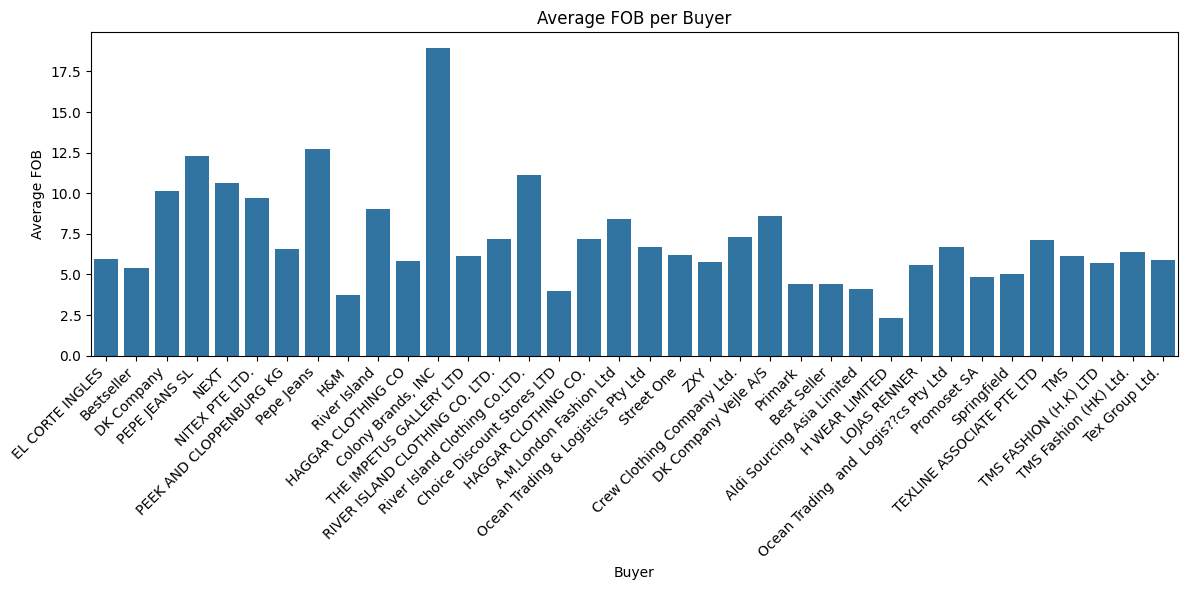

In [47]:


# Plotting Average FOB by Buyer
plt.figure(figsize=(12, 6))
sns.barplot(x=buyer_summary.index, y='FOB', data=buyer_summary)
plt.title('Average FOB per Buyer')
plt.xlabel('Buyer')
plt.ylabel('Average FOB')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


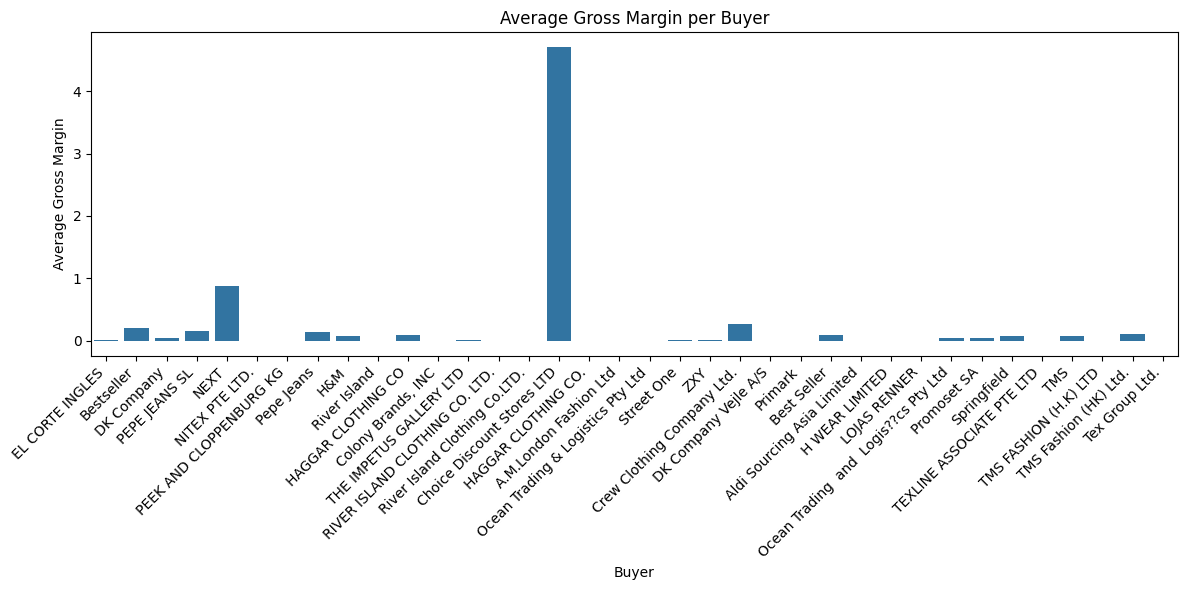

In [48]:

# Plotting Average Gross Margin by Buyer
plt.figure(figsize=(12, 6))
sns.barplot(x=buyer_summary.index, y='Gross_Margin', data=buyer_summary)
plt.title('Average Gross Margin per Buyer')
plt.xlabel('Buyer')
plt.ylabel('Average Gross Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

                                       Order_Qty      FOB  Gross_Margin  \
Buyer                                                                     
EL CORTE INGLES                          43691.0  4794.08  9.960000e+00   
Bestseller                               40197.0  1138.47  4.334000e+01   
DK Company                               23413.0   996.42  4.690000e+00   
PEPE JEANS SL                            13908.0   701.35  8.790000e+00   
NEXT                                     11900.0  1073.12  8.903000e+01   
NITEX PTE LTD.                            9554.0   193.82 -3.108624e-15   
PEEK AND CLOPPENBURG KG                   8006.0   209.62 -8.881784e-16   
Pepe Jeans                                6803.0   216.08  2.400000e+00   
H&M                                       6313.0   719.08  1.414000e+01   
River Island                              5241.0   189.90  8.881784e-15   
HAGGAR CLOTHING CO                        4296.0   290.20  4.690000e+00   
Colony Brands, INC       

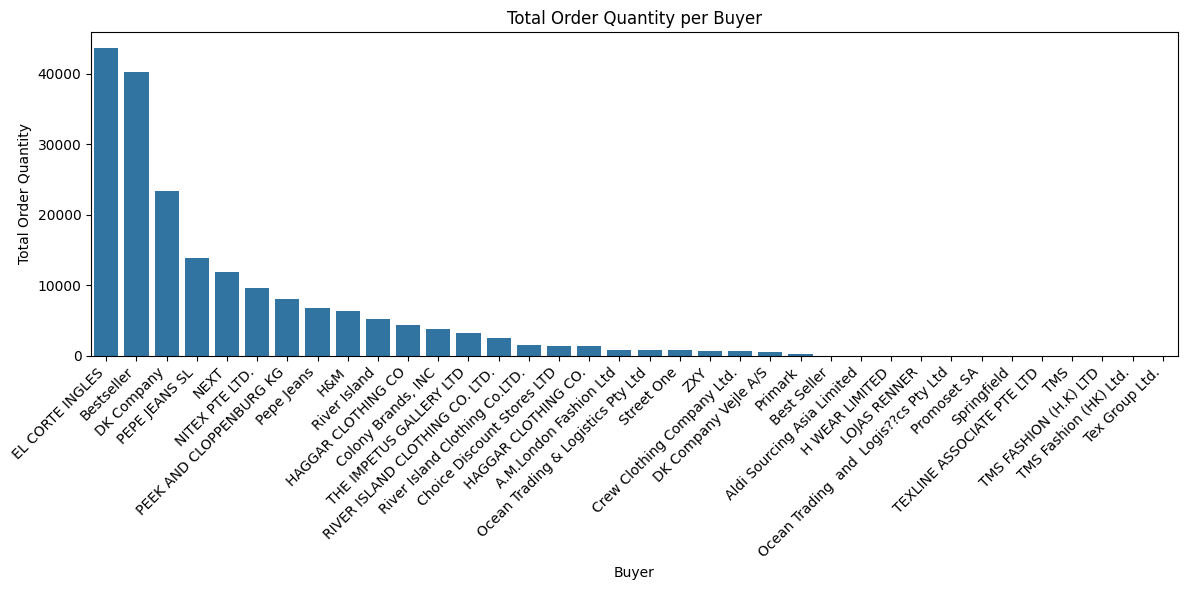

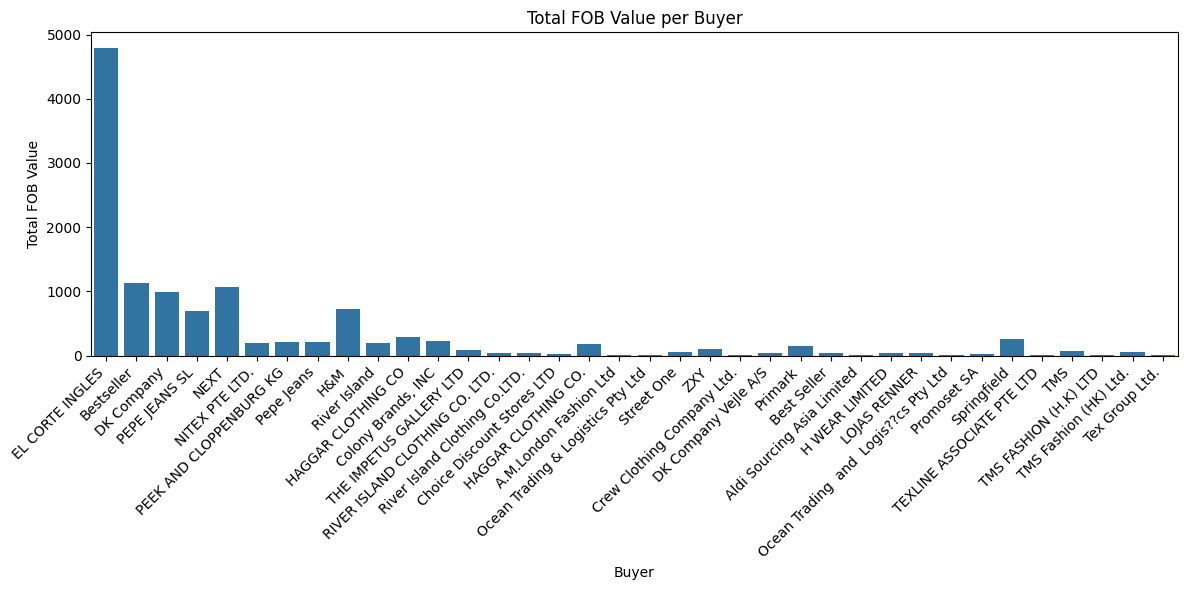

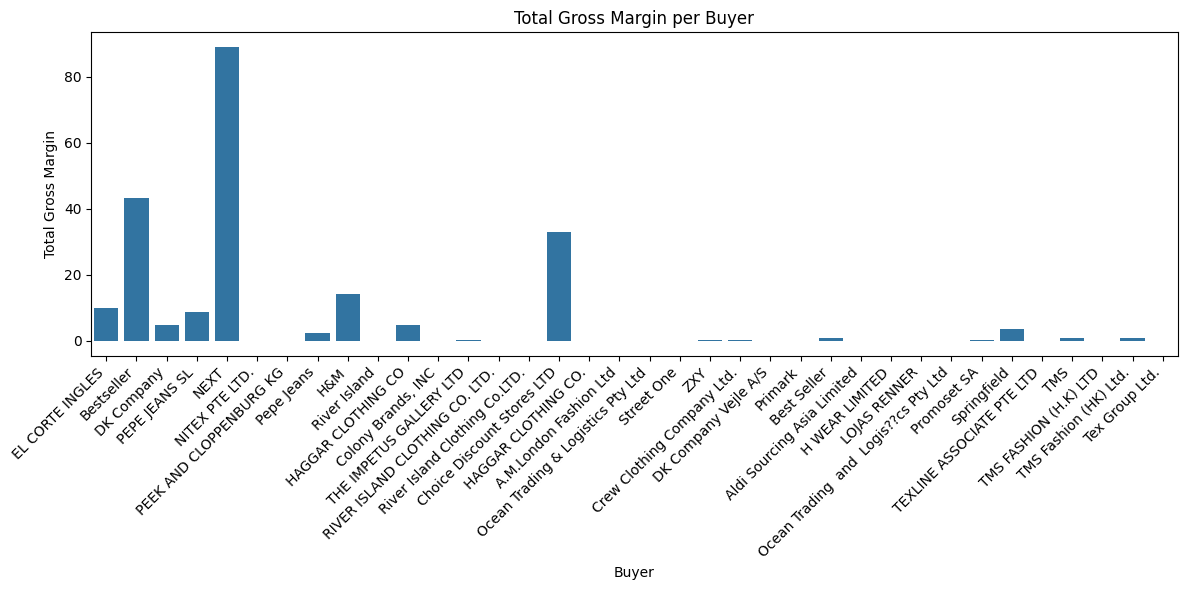

In [51]:
# prompt: Merchandiser contribute to create order from buyer

# Assuming 'df' is your DataFrame from the previous code

# Function to analyze buyer contribution to order creation
def analyze_buyer_contribution(df):
    """
    Analyzes buyer contribution to orders, focusing on order quantity, FOB value, and gross margin.

    Args:
        df: The input DataFrame containing order data.

    Returns:
        A DataFrame summarizing buyer contributions, sorted by order quantity.
    """

    buyer_summary = df.groupby('Buyer').agg({
        'Order_Qty': 'sum',
        'FOB': 'sum',  # Sum of FOB values for each buyer
        'Gross_Margin': 'sum'  # Sum of Gross Margin for each buyer
    }).sort_values(by='Order_Qty', ascending=False)

    buyer_summary['Avg_FOB'] = buyer_summary['FOB'] / df.groupby('Buyer')['Order_Qty'].count()
    buyer_summary['Avg_Gross_Margin'] = buyer_summary['Gross_Margin'] / df.groupby('Buyer')['Order_Qty'].count()

    return buyer_summary

# Example usage
buyer_contribution = analyze_buyer_contribution(df)
print(buyer_contribution)


# Visualization of Buyer Contribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x=buyer_contribution.index, y='Order_Qty', data=buyer_contribution)
plt.title('Total Order Quantity per Buyer')
plt.xlabel('Buyer')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=buyer_contribution.index, y='FOB', data=buyer_contribution)
plt.title('Total FOB Value per Buyer')
plt.xlabel('Buyer')
plt.ylabel('Total FOB Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x=buyer_contribution.index, y='Gross_Margin', data=buyer_contribution)
plt.title('Total Gross Margin per Buyer')
plt.xlabel('Buyer')
plt.ylabel('Total Gross Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


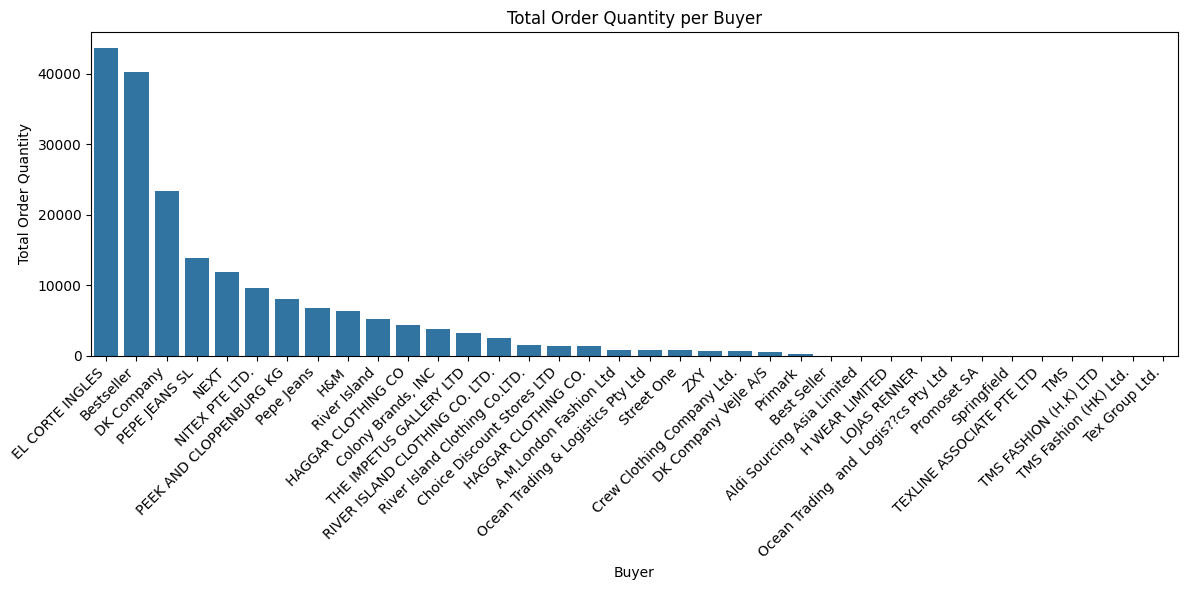

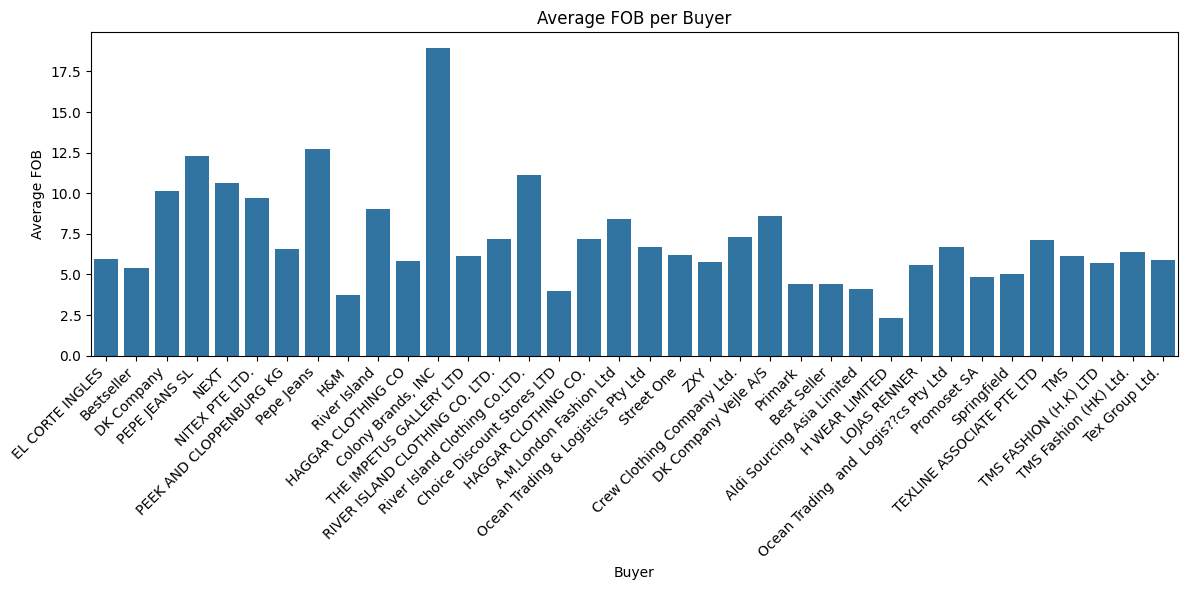

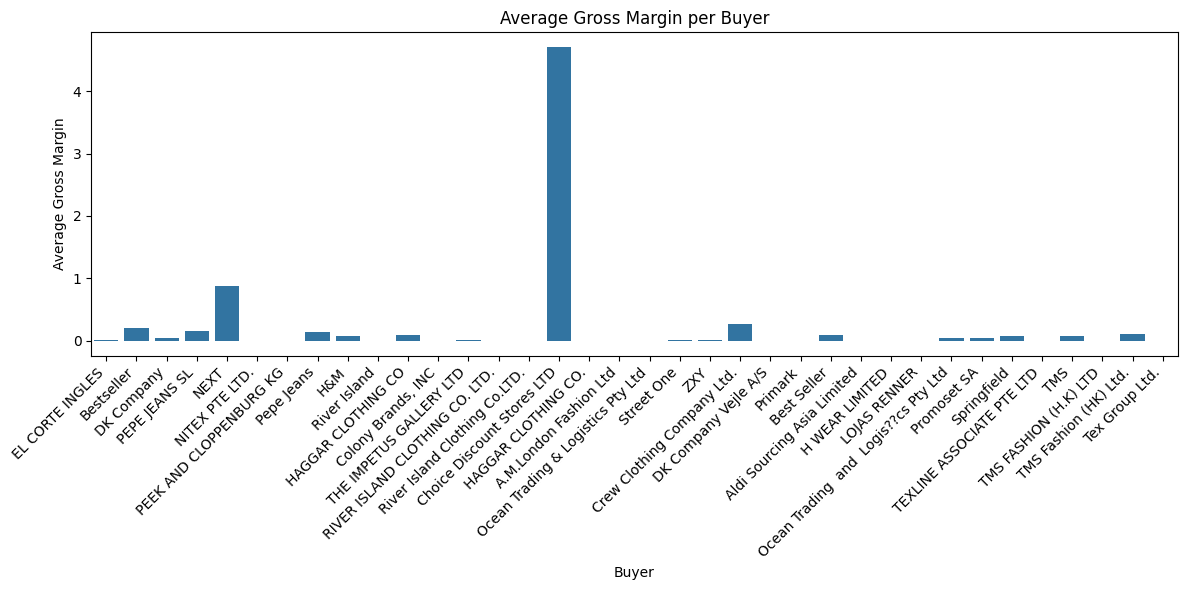

Buyer
A.M.London Fashion Ltd                   1
Aldi Sourcing Asia Limited               1
Best Seller                              3
Bestseller                               8
Choice Discount Stores LTD               1
Colony Brands, INC                       1
Crew Clothing Company Ltd.               1
DK Company                               3
DK Company Vejle A/S                     1
EL CORTE INGLES                          3
H WEAR LIMITED                           1
H&M                                      5
HAGGAR CLOTHING CO                       2
HAGGAR CLOTHING CO.                      1
LOJAS RENNER                             1
NEXT                                     4
NITEX PTE LTD.                           1
Ocean Trading  and  Logis??cs Pty Ltd    1
Ocean Trading & Logistics Pty Ltd        1
PEEK AND CLOPPENBURG KG                  1
PEPE JEANS SL                            2
Pepe Jeans                               1
Primark                                  3
Promo

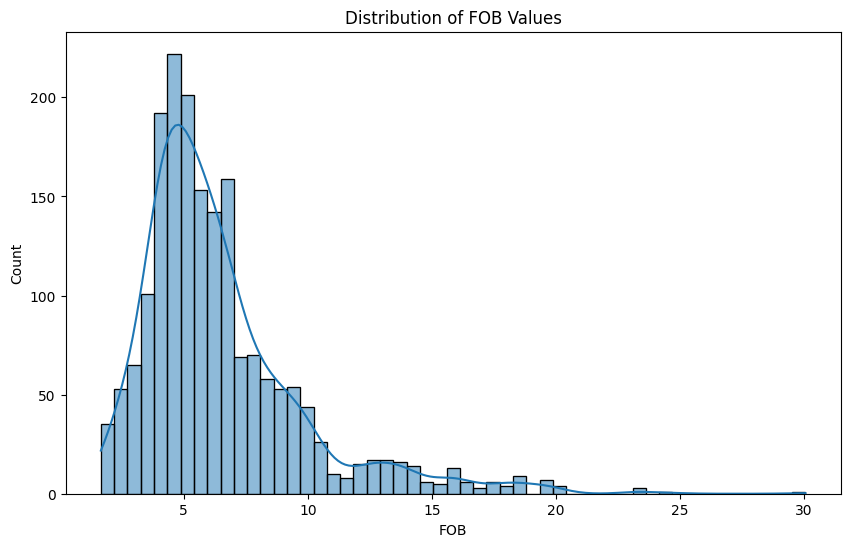

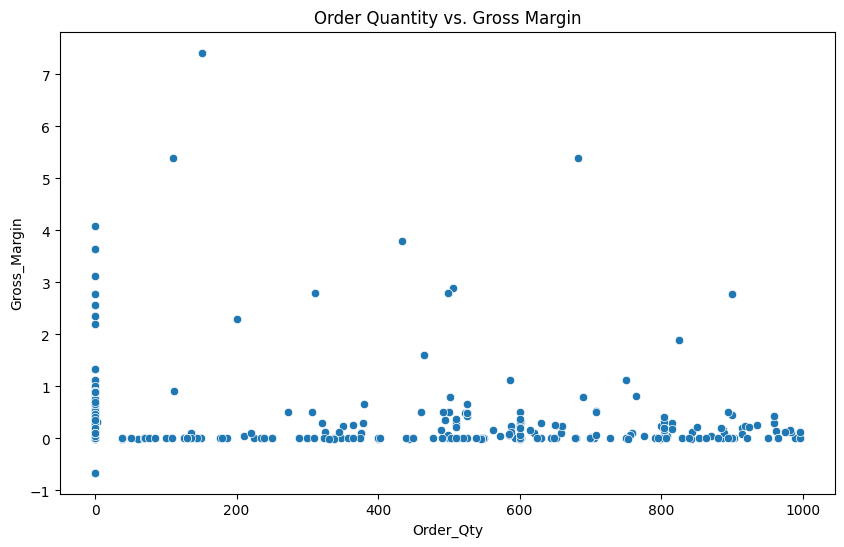

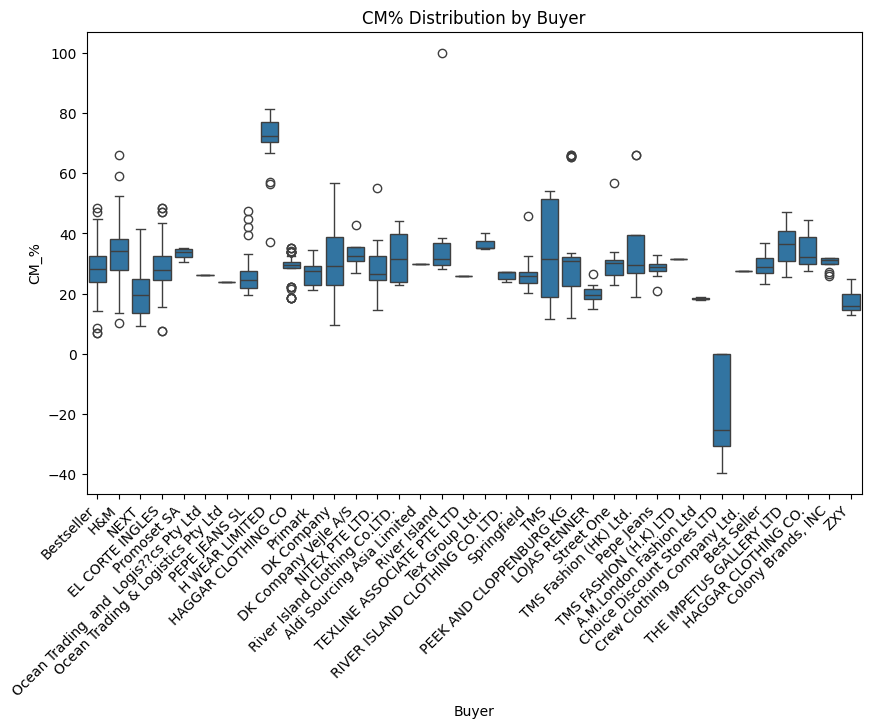

In [50]:
# prompt: Visualize it

import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Order Quantity by Buyer
plt.figure(figsize=(12, 6))
sns.barplot(x=buyer_summary.index, y='Order_Qty', data=buyer_summary)
plt.title('Total Order Quantity per Buyer')
plt.xlabel('Buyer')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Plotting Average FOB by Buyer
plt.figure(figsize=(12, 6))
sns.barplot(x=buyer_summary.index, y='FOB', data=buyer_summary)
plt.title('Average FOB per Buyer')
plt.xlabel('Buyer')
plt.ylabel('Average FOB')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Plotting Average Gross Margin by Buyer
plt.figure(figsize=(12, 6))
sns.barplot(x=buyer_summary.index, y='Gross_Margin', data=buyer_summary)
plt.title('Average Gross Margin per Buyer')
plt.xlabel('Buyer')
plt.ylabel('Average Gross Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Assuming 'Merchandiser' is a column in your DataFrame 'df'
merchandiser_counts = df.groupby('Buyer')['Merchandiser'].nunique()
print(merchandiser_counts)

#Additional visualization examples (adapt column names as needed)
plt.figure(figsize=(10,6))
sns.histplot(df['FOB'], kde=True) #histogram of FOB values
plt.title('Distribution of FOB Values')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Order_Qty', y='Gross_Margin', data=df) #scatter plot of order quantity vs. gross margin
plt.title('Order Quantity vs. Gross Margin')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Buyer', y='CM_%', data=df) #boxplot of CM% per buyer
plt.title('CM% Distribution by Buyer')
plt.xticks(rotation=45, ha='right')
plt.show()


## 📊 3. Basic Data Exploration

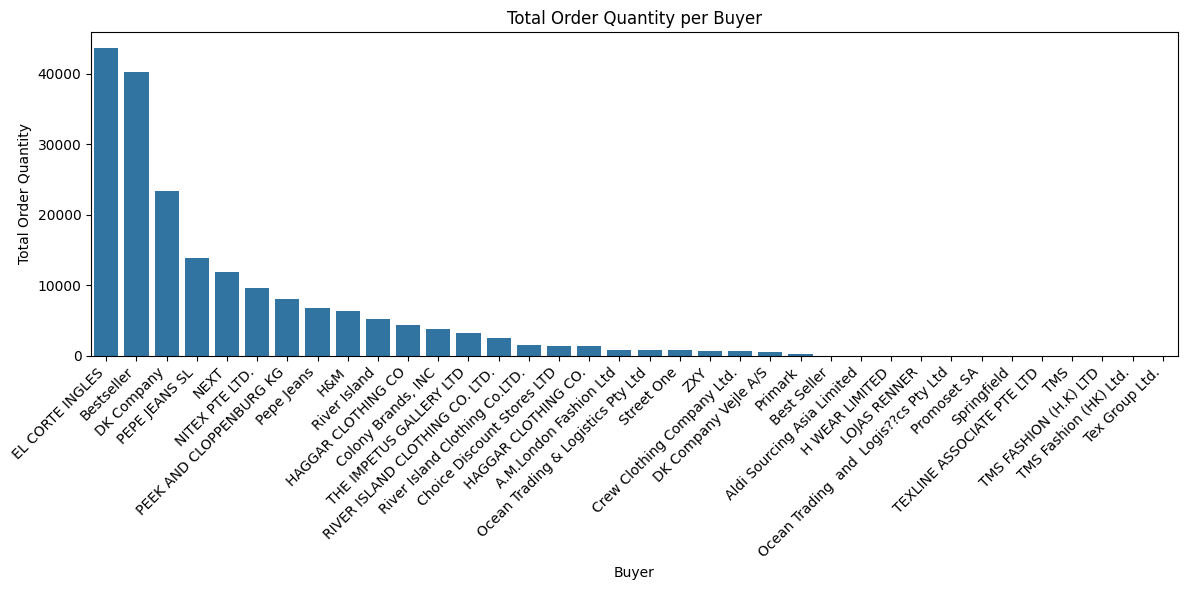

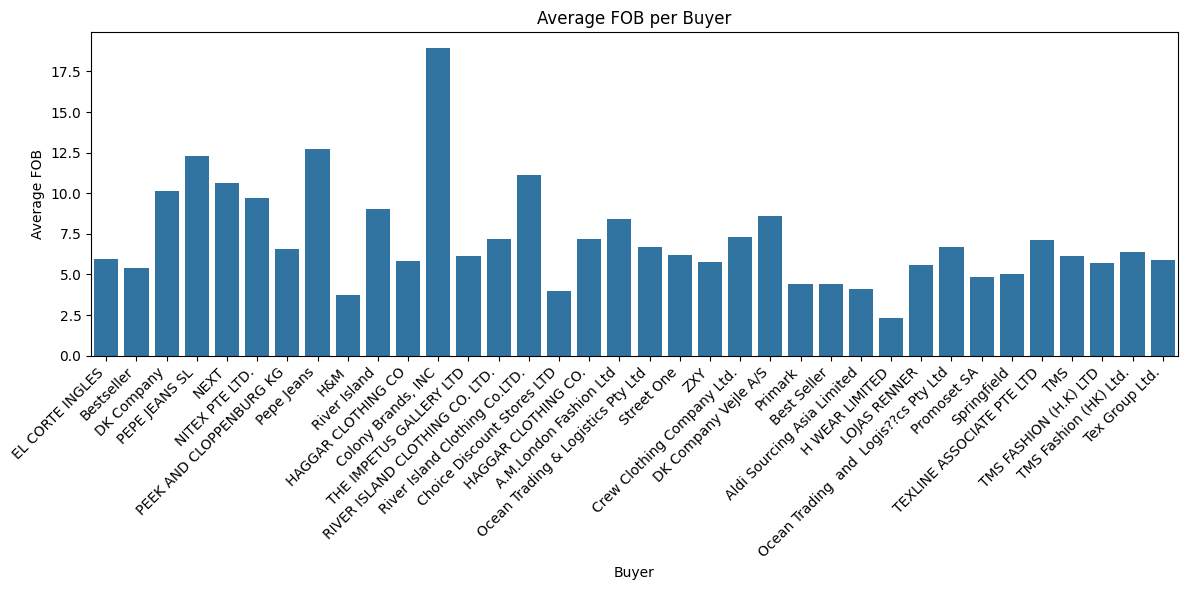

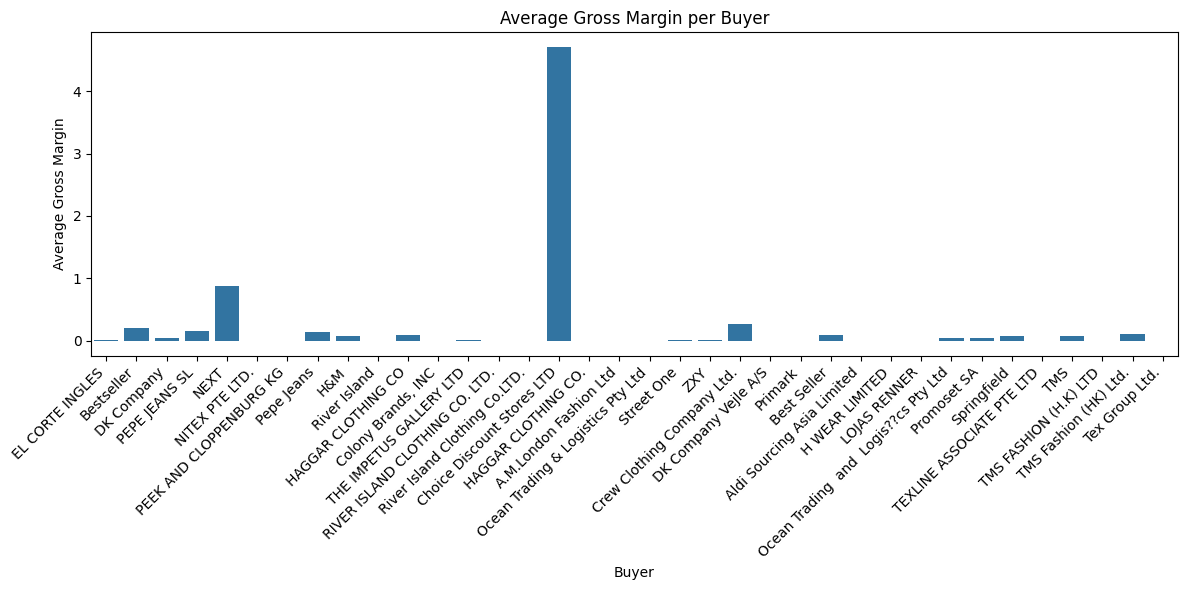

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Buyer             1862 non-null   object 
 1   SC/LC No          1862 non-null   object 
 2   Style Code        1862 non-null   object 
 3   Style Name        992 non-null    object 
 4   Season            906 non-null    object 
 5   Pcs/set           1862 non-null   int64  
 6   Order Qty         1862 non-null   object 
 7   FOB               1862 non-null   float64
 8   CM                1862 non-null   float64
 9   CM (%)            1862 non-null   object 
 10  SMV               418 non-null    float64
 11  EPM               1862 non-null   float64
 12  CostPerMinute     410 non-null    float64
 13  Eficience         372 non-null    float64
 14  Eficenc

Buyer                 SC/LC No Style Code                  Style Name  \
0  Bestseller     Bestseller PIECES/ 2   17154372       PCSALMINA 2/4 TOP WVN   
1         H&M   MGSL/H&M-Mens DBL-S.02    1257590  BERT SLIM CA STRETCH SHIRT   
2         H&M    MGSL/H&M-Mens DBL-S.0    1257590  BERT SLIM CA STRETCH SHIRT   
3        NEXT  MGNSL/VOGUE SOURCING/06     N38774                KAFTAN DRESS   
4        NEXT             DC RMR470325     N38774                KAFTAN DRESS   

              Season  Pcs/set   Order Qty    FOB    CM   CM (%)  ...  \
0  COL 4 SPRING 2025        1    4,719.00   6.41  1.78  27.79%   ...   
1             2-2025        1  240,014.00   4.34  1.25  28.80%   ...   
2             2-2025        1   12,201.00   4.34  1.25  28.80%   ...   
3                NaN        1    1,999.00  14.84  2.00  13.48%   ...   
4                NaN        1    1,999.00  14.84  2.00  13.48%   ...   

   Fabric/Yarn Cost  Trims Cost  Material Cost  Material (%)  Other Cost  \
0              4.13        0.50           4.63       72.21%         0.00   
1              2.72        0.37           3.09       71.20%         0.00   
2              2.72        0.37           3.09       71.20%         0.00   
3             10.22        0.96          11.18       75.30%         0.19   
4             10.22        0.96          11.18       75.30%         0.19   

   Commercial Cost       %  Commission Cost     %.1  Merchandiser  
0             0.00  0.00%               0.0  0.00%            NaN  
1             0.00  0.00%               0.0  0.00%            NaN  
2             0.00  0.00%               0.0  0.00%            NaN  
3             0.22  1.48%               0.5  3.50%         Mahbub  
4             0.22  1.48%               0.5  3.50%         Mahbub  

[5 rows x 25 columns]

Buyer       SC/LC No Style Code                Style Name  \
1857  Best Seller  Bestseller 02   13243686     NBMHUGO SS LOOSE BODY   
1858  Best Seller  Bestseller 02   13243715    NMMHUGO SS LOOSE SHIRT   
1859  Best Seller  Bestseller 02   13243746  NMMJESPER SS LOOSE SHIRT   
1860  Best Seller  Bestseller 02   13243739      NMMJESPER SHORTS LIL   
1861  Best Seller  Bestseller 02   13243733     NBMJESPER LOOSE SHORT   

                  Season  Pcs/set Order Qty   FOB    CM   CM (%)  ...  \
1857  MAIN 3 SUMMER 2025        1  1,020.00  4.10  1.50  36.63%   ...   
1858  MAIN 3 SUMMER 2025        1  1,464.00  4.35  1.32  30.37%   ...   
1859  MAIN 3 SUMMER 2025        1  1,560.00  5.25  1.32  25.15%   ...   
1860  MAIN 3 SUMMER 2025        1  1,560.00  5.20  1.20  23.10%   ...   
1861  MAIN 3 SUMMER 2025        1  1,992.00  4.90  1.50  30.63%   ...   

      Fabric/Yarn Cost  Trims Cost  Material Cost  Material (%)  Other Cost  \
1857              1.32        0.60           1.92       46.89%         0.24   
1858              1.68        0.60           2.28       52.45%         0.25   
1859              2.50        0.84           3.34       63.61%         0.18   
1860              2.43        0.99           3.42       65.79%         0.18   
1861              1.96        0.94           2.90       59.30%         0.17   

      Commercial Cost       %  Commission Cost     %.1  Merchandiser  
1857             0.06  1.47%              0.20  5.00%         Sabbir  
1858             0.10  2.30%              0.21  5.00%         Sabbir  
1859             0.06  1.14%              0.25  5.00%         Sabbir  
1860             0.05  0.96%              0.25  5.00%         Sabbir  
1861             0.00  0.00%              0.23  5.00%         Sabbir  

[5 rows x 25 columns]

Number of rows: 1862
Number of columns: 25

Missing values per column:


Buyer                  0
SC/LC No               0
Style Code             0
Style Name           870
Season               956
Pcs/set                0
Order Qty              0
FOB                    0
CM                     0
CM (%)                 0
SMV                 1444
EPM                    0
CostPerMinute       1452
Eficience           1490
EficenceCPM         1490
Fabric/Yarn Cost       0
Trims Cost             0
Material Cost          0
Material (%)           0
Other Cost             0
Commercial Cost        0
%                      0
Commission Cost        0
%.1                    0
Merchandiser           3
dtype: int64


Data types of each column:


Buyer                object
SC/LC No             object
Style Code           object
Style Name           object
Season               object
Pcs/set               int64
Order Qty            object
FOB                 float64
CM                  float64
CM (%)               object
SMV                 float64
EPM                 float64
CostPerMinute       float64
Eficience           float64
EficenceCPM         float64
Fabric/Yarn Cost    float64
Trims Cost          float64
Material Cost       float64
Material (%)         object
Other Cost          float64
Commercial Cost     float64
%                    object
Commission Cost     float64
%.1                  object
Merchandiser         object
dtype: object


Unique values for 'column_name':
['Bestseller' 'H&M' 'NEXT' 'EL CORTE INGLES' 'Promoset SA'
 'Ocean Trading  and  Logis??cs Pty Ltd'
 'Ocean Trading & Logistics Pty Ltd' 'PEPE JEANS SL' 'H WEAR LIMITED'
 'HAGGAR CLOTHING CO' 'Primark' 'DK Company' 'DK Company Vejle A/S'
 'NITEX PTE LTD.' 'River Island Clothing Co.LTD.'
 'Aldi Sourcing Asia Limited' 'River Island' 'TEXLINE ASSOCIATE PTE LTD'
 'Tex Group Ltd.' 'RIVER ISLAND CLOTHING CO. LTD.' 'Springfield' 'TMS'
 'PEEK AND CLOPPENBURG KG' 'LOJAS RENNER' 'Street One'
 'TMS Fashion (HK) Ltd.' 'Pepe Jeans' 'TMS FASHION (H.K) LTD'
 'A.M.London Fashion Ltd' 'Choice Discount Stores LTD'
 'Crew Clothing Company Ltd.' 'Best Seller' 'THE IMPETUS GALLERY LTD'
 'HAGGAR CLOTHING CO.' 'Colony Brands, INC' 'ZXY']

Memory usage of the DataFrame:
Index                  132
Buyer               128902
SC/LC No            135481
Style Code          122429
Style Name           98307
Season               90264
Pcs/set              14896
Order Qty           

Buyer          Style_Name   FOB  Total_Cost  \
1454  Choice Discount Stores LTD              Q69758  5.32       -2.10   
1455  Choice Discount Stores LTD              C73845  4.31       -1.09   
1452  Choice Discount Stores LTD              C83697  4.31       -1.09   
982                          H&M  SVERRE WD SET 3PCS  8.66        4.57   
1453  Choice Discount Stores LTD              D94548  2.79       -1.00   

      Gross_Margin  
1454          7.42  
1455          5.40  
1452          5.40  
982           4.09  
1453          3.79

📊 Buyer Summary:


Order_Qty        FOB       CM_%  \
Buyer                                                                    
EL CORTE INGLES                          43691.0   5.933267  28.527896   
Bestseller                               40197.0   5.395592  28.355071   
DK Company                               23413.0  10.167551  30.765714   
PEPE JEANS SL                            13908.0  12.304386  25.970877   
NEXT                                     11900.0  10.624950  20.563168   
NITEX PTE LTD.                            9554.0   9.691000  28.567000   
PEEK AND CLOPPENBURG KG                   8006.0   6.550625  32.416250   
Pepe Jeans                                6803.0  12.710588  28.434118   
H&M                                       6313.0   3.764817  33.756492   
River Island                              5241.0   9.042857  35.733810   
HAGGAR CLOTHING CO                        4296.0   5.804000  28.659600   
Colony Brands, INC                        3780.0  18.962500  30.198333   
THE IMPETUS GALLERY LTD                   3270.0   6.114286  36.007857   
RIVER ISLAND CLOTHING CO. LTD.            2550.0   7.193333  26.130000   
River Island Clothing Co.LTD.             1500.0  11.135000  32.395000   
Choice Discount Stores LTD                1378.0   3.954286 -17.984286   
HAGGAR CLOTHING CO.                       1357.0   7.202692  33.695385   
A.M.London Fashion Ltd                     843.0   8.395000  18.345000   
Ocean Trading & Logistics Pty Ltd          830.0   6.700000  23.880000   
Street One                                 809.0   6.171111  31.686667   
ZXY                                        660.0   5.755294  17.182941   
Crew Clothing Company Ltd.                 650.0   7.310000  27.380000   
DK Company Vejle A/S                       500.0   8.580000  33.665000   
Primark                                    220.0   4.398788  27.263333   
Best Seller                                  0.0   4.421818  29.318182   
Aldi Sourcing Asia Limited                   0.0   4.110000  29.920000   
H WEAR LIMITED                               0.0   2.318235  70.498235   
LOJAS RENNER                                 0.0   5.590000  19.793750   
Ocean Trading  and  Logis??cs Pty Ltd        0.0   6.710000  26.090000   
Promoset SA                                  0.0   4.817500  33.167500   
Springfield                                  0.0   5.029057  26.292075   
TEXLINE ASSOCIATE PTE LTD                    0.0   7.150000  25.870000   
TMS                                          0.0   6.125833  34.258333   
TMS FASHION (H.K) LTD                        0.0   5.700000  31.600000   
TMS Fashion (HK) Ltd.                        0.0   6.380000  36.773750   
Tex Group Ltd.                               0.0   5.886667  36.696667   

                                       Gross_Margin  
Buyer                                                
EL CORTE INGLES                        1.232673e-02  
Bestseller                             2.054028e-01  
DK Company                             4.785714e-02  
PEPE JEANS SL                          1.542105e-01  
NEXT                                   8.814851e-01  
NITEX PTE LTD.                        -1.554312e-16  
PEEK AND CLOPPENBURG KG               -2.775558e-17  
Pepe Jeans                             1.411765e-01  
H&M                                    7.403141e-02  
River Island                           4.229421e-16  
HAGGAR CLOTHING CO                     9.380000e-02  
Colony Brands, INC                     5.921189e-16  
THE IMPETUS GALLERY LTD                1.571429e-02  
RIVER ISLAND CLOTHING CO. LTD.         5.921189e-16  
River Island Clothing Co.LTD.          4.440892e-16  
Choice Discount Stores LTD             4.708571e+00  
HAGGAR CLOTHING CO.                   -1.153846e-03  
A.M.London Fashion Ltd                -5.000000e-03  
Ocean Trading & Logistics Pty Ltd      0.000000e+00  
Street One                             1.111111e-02  
ZXY                                   

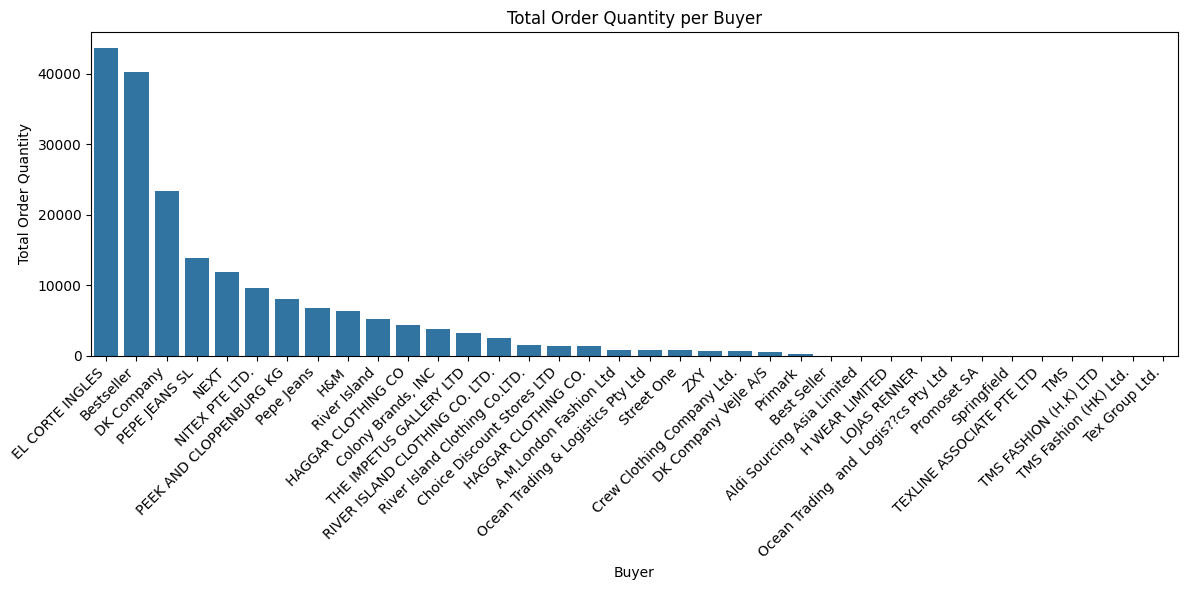

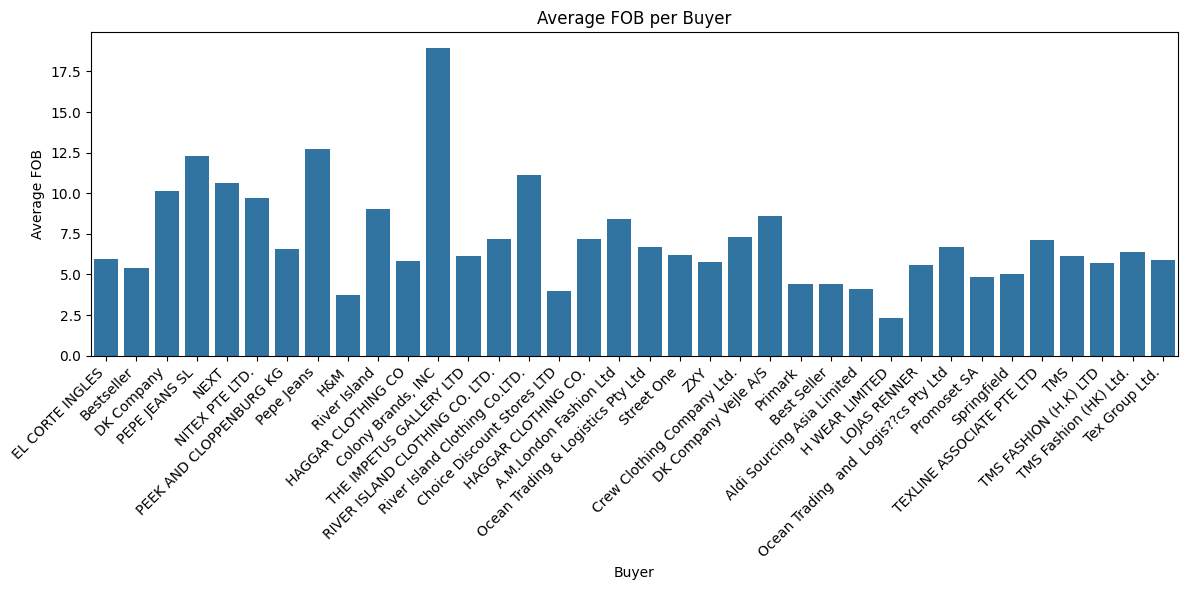

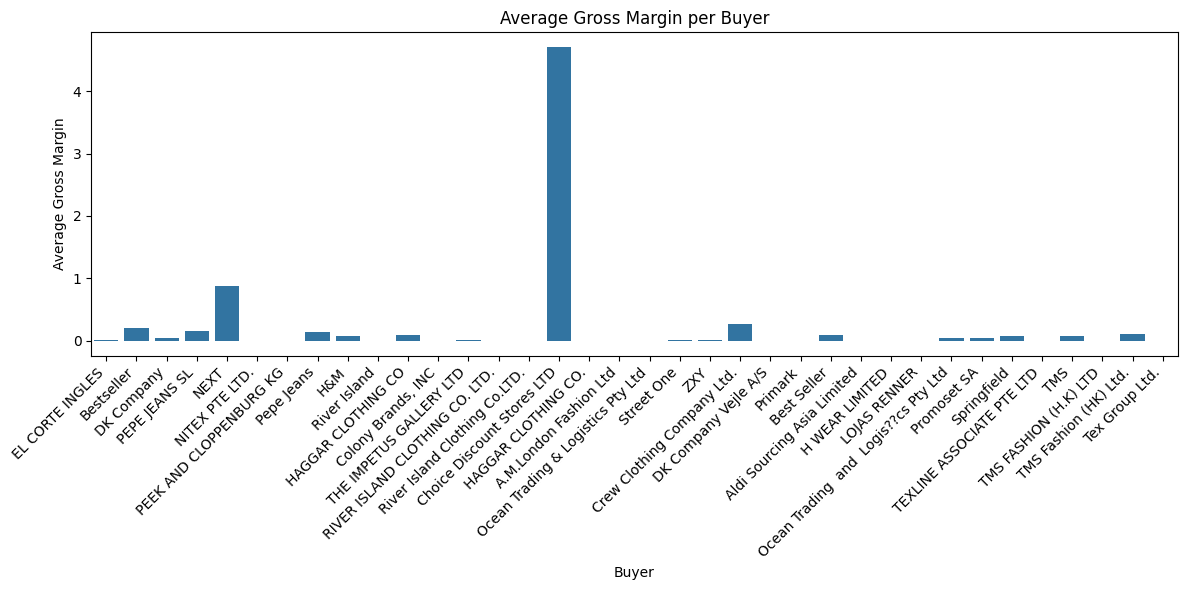

In [44]:
# prompt: more inside ex

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import warnings
from google.colab import drive





# Check for missing values in each column
print("\nMissing values per column:")
display(df.isnull().sum())
# Get data types of each column
print("\nData types of each column:")
display(df.dtypes)
# Display unique values for specific columns (replace 'column_name' with actual column name)
# This is useful for categorical columns to see the different categories
print("\nUnique values for 'column_name':")
print(df['Buyer'].unique())
# Calculate the memory usage of the DataFrame
print("\nMemory usage of the DataFrame:")
print(df.memory_usage(deep=True))

# Examine the index of the DataFrame
print("\nDataFrame index:")
print(df.index)
# Get column names
print("\nColumn Names:")
df.columns

# ##  2. Data Cleaning

print("Data Info:")
df.info()

# Rename columns (if needed)
df.columns = [col.strip().replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]

# Convert percentages from strings to floats (if columns exist)
percent_cols = ['CM_%', 'Material_%', 'Commission_%']
for col in percent_cols:
    if col in df.columns:
        df[col] = df[col].replace('%', '', regex=True)
        df[col] = df[col].astype(str).str.replace('(', '-', regex=False).str.replace(')', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Clean numeric columns (handle negative values in parentheses)
numeric_cols = ['Order_Qty', 'FOB', 'CM', 'Fabric/Yarn_Cost', 'Trims_Cost', 'Material_Cost',
                'Other_Cost', 'Commercial_Cost', 'Commission_Cost']

for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('(', '-', regex=False).str.replace(')', '', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill missing numeric values with 0
df.fillna(0, inplace=True)

# Fill missing numeric values with 0
df.fillna(0, inplace=True)
df.sample(10)
df.columns = [col.strip().replace(' ', '_').replace('(', '').replace(')', '') for col in df.columns]

# Gross Margin Calculation
df['Total_Cost'] = (
    df['CM'] +
    df['Material_Cost'] +
    df['Other_Cost'] +
    df['Commercial_Cost'] +
    df['Commission_Cost']
)

df['Gross_Margin'] = df['FOB'] - df['Total_Cost']

# Sort by highest margin
df_sorted = df.sort_values(by='Gross_Margin', ascending=False)

# Display selected columns (also using underscores now)
display(df_sorted[['Buyer', 'Style_Name', 'FOB', 'Total_Cost', 'Gross_Margin']].head())

#  Grouping & Aggregation

# Buyer Summary
buyer_summary = df.groupby('Buyer').agg({
    'Order_Qty': 'sum',
    'FOB': 'mean',
    'CM_%': 'mean',
    'Gross_Margin': 'mean'
}).sort_values(by='Order_Qty', ascending=False)

print("📊 Buyer Summary:")
display(buyer_summary)

# ## 📊 3. Basic Data Exploration

# Plotting Order Quantity by Buyer
plt.figure(figsize=(12, 6))
sns.barplot(x=buyer_summary.index, y='Order_Qty', data=buyer_summary)
plt.title('Total Order Quantity per Buyer')
plt.xlabel('Buyer')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Average FOB by Buyer
plt.figure(figsize=(12, 6))
sns.barplot(x=buyer_summary.index, y='FOB', data=buyer_summary)
plt.title('Average FOB per Buyer')
plt.xlabel('Buyer')
plt.ylabel('Average FOB')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Average Gross Margin by Buyer
plt.figure(figsize=(12, 6))
sns.barplot(x=buyer_summary.index, y='Gross_Margin', data=buyer_summary)
plt.title('Average Gross Margin per Buyer')
plt.xlabel('Buyer')
plt.ylabel('Average Gross Margin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


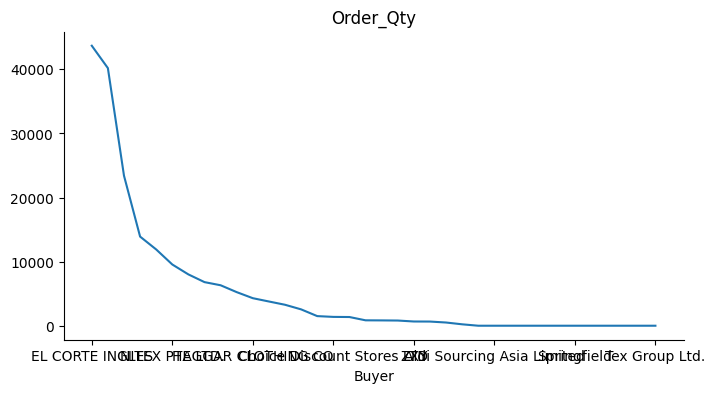

In [53]:
# @title Order_Qty

from matplotlib import pyplot as plt
buyer_summary['Order_Qty'].plot(kind='line', figsize=(8, 4), title='Order_Qty')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
df

## 📌 4. Feature Engineering

In [54]:
# prompt: write feature engineering

# Calculate the ratio of Material Cost to FOB
df['Material_Cost_Ratio'] = df['Material_Cost'] / df['FOB']

# Calculate the ratio of Other Costs to FOB
df['Other_Cost_Ratio'] = df['Other_Cost'] / df['FOB']

# Calculate the ratio of Commercial Costs to FOB
df['Commercial_Cost_Ratio'] = df['Commercial_Cost'] / df['FOB']

# Calculate the ratio of Commission Costs to FOB
df['Commission_Cost_Ratio'] = df['Commission_Cost'] / df['FOB']

# Create an interaction term between Order Quantity and FOB
df['Order_FOB_Interaction'] = df['Order_Qty'] * df['FOB']

# Log transformation of numeric features (handle potential zeros)
for col in ['Order_Qty', 'FOB', 'CM', 'Material_Cost', 'Other_Cost', 'Commercial_Cost', 'Commission_Cost', 'Gross_Margin']:
    df[col + '_log'] = np.log1p(df[col]) # Use log1p to handle zero values

# Calculate cost per unit
df['Cost_per_Unit'] = df['Total_Cost'] / df['Order_Qty']

# Example: Binning Order Quantity into categories
bins = [0, 100, 500, 1000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
df['Order_Qty_Category'] = pd.cut(df['Order_Qty'], bins=bins, labels=labels, right=False)

# Display the updated DataFrame with new features
display(df.head())


Buyer                 SC/LC_No Style_Code                  Style_Name  \
0  Bestseller     Bestseller PIECES/ 2   17154372       PCSALMINA 2/4 TOP WVN   
1         H&M   MGSL/H&M-Mens DBL-S.02    1257590  BERT SLIM CA STRETCH SHIRT   
2         H&M    MGSL/H&M-Mens DBL-S.0    1257590  BERT SLIM CA STRETCH SHIRT   
3        NEXT  MGNSL/VOGUE SOURCING/06     N38774                KAFTAN DRESS   
4        NEXT             DC RMR470325     N38774                KAFTAN DRESS   

              Season  Pcs/set  Order_Qty    FOB    CM   CM_%  ...  \
0  COL 4 SPRING 2025        1        0.0   6.41  1.78  27.79  ...   
1             2-2025        1        0.0   4.34  1.25  28.80  ...   
2             2-2025        1        0.0   4.34  1.25  28.80  ...   
3                  0        1        0.0  14.84  2.00  13.48  ...   
4                  0        1        0.0  14.84  2.00  13.48  ...   

   Order_Qty_log   FOB_log    CM_log  Material_Cost_log  Other_Cost_log  \
0            0.0  2.002830  1.022451           1.728109        0.000000   
1            0.0  1.675226  0.810930           1.408545        0.000000   
2            0.0  1.675226  0.810930           1.408545        0.000000   
3            0.0  2.762538  1.098612           2.499795        0.173953   
4            0.0  2.762538  1.098612           2.499795        0.173953   

   Commercial_Cost_log  Commission_Cost_log  Gross_Margin_log  Cost_per_Unit  \
0             0.000000             0.000000          0.000000            inf   
1             0.000000             0.000000          0.000000            inf   
2             0.000000             0.000000          0.000000            inf   
3             0.198851             0.405465          0.559616            inf   
4             0.198851             0.405465          0.559616            inf   

   Order_Qty_Category  
0                 Low  
1                 Low  
2                 Low  
3                 Low  
4                 Low  

[5 rows x 42 columns]

## 📈 5. Visualization

              Order_Qty
Merchandiser           
0                   0.0
AKZilani         4456.0
Alamgir           178.0
Anwar           27655.0
Asaduzzaman      1455.0
Babu            21845.0
Ema                 0.0
Fakrul           3239.0
Hossain          4884.0
Kuasha            630.0
Mahbub           5389.0
Mohsin              0.0
Nazim           13680.0
Nipun           25664.0
Nooruddin       41521.0
Prince           3546.0
Rajon            2608.0
Ratna            9157.0
Sabbir           2424.0
Shohel           6758.0
Sourov          16580.0
Zaman               0.0


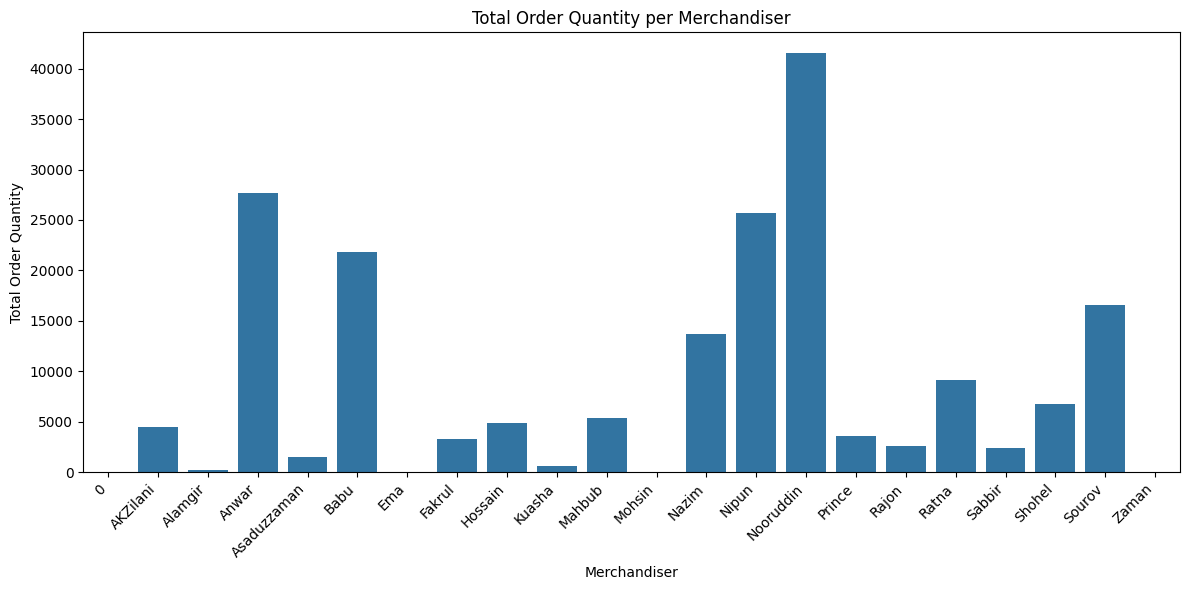

In [56]:
# prompt: Each marchentizer are contribute to order creation from buyer

# Assuming 'Merchandiser' is a column in your DataFrame 'df'
merchandiser_contribution = df.groupby('Merchandiser').agg({'Order_Qty': 'sum'})
print(merchandiser_contribution)

plt.figure(figsize=(12, 6))
sns.barplot(x=merchandiser_contribution.index, y='Order_Qty', data=merchandiser_contribution)
plt.title('Total Order Quantity per Merchandiser')
plt.xlabel('Merchandiser')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


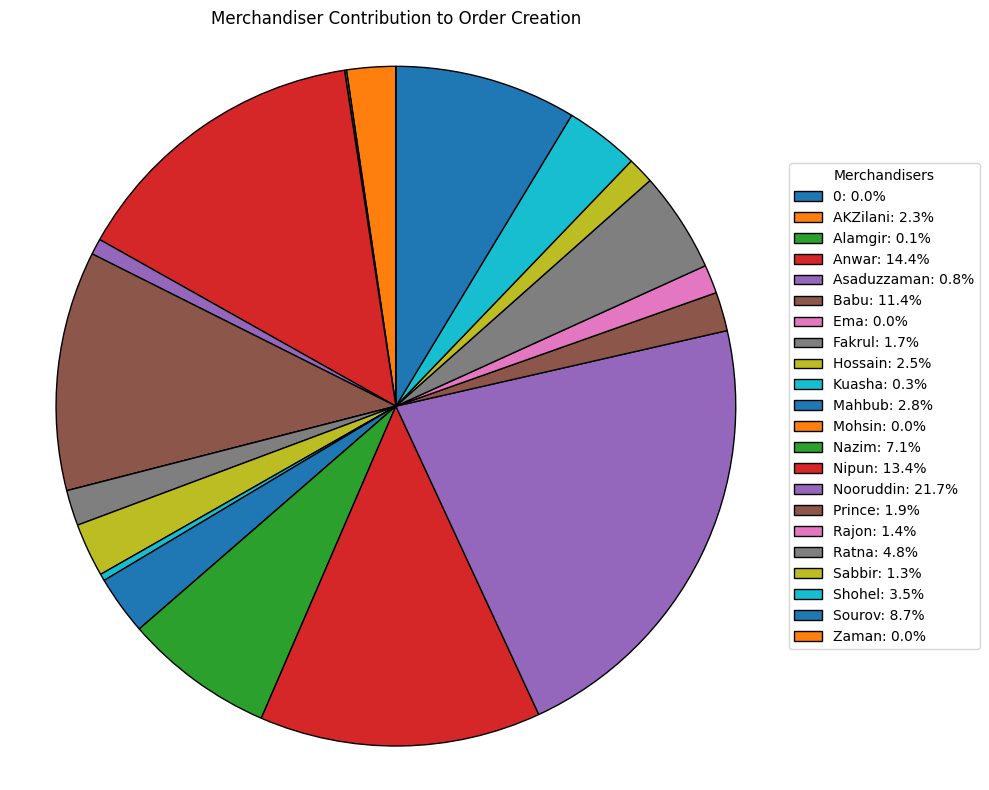

In [64]:
import matplotlib.pyplot as plt

# Group data by Merchandiser
merchandiser_contribution = df.groupby('Merchandiser')['Order_Qty'].sum()

# Compute percentage contribution
total = merchandiser_contribution.sum()
percentages = (merchandiser_contribution / total) * 100

# Create labels with name and percentage
legend_labels = [f'{name}: {pct:.1f}%' for name, pct in zip(merchandiser_contribution.index, percentages)]

# Plot pie chart without labels or percentages inside
plt.figure(figsize=(10, 8))
wedges, _ = plt.pie(
    merchandiser_contribution,
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

# Add title and legend
plt.title('Merchandiser Contribution to Order Creation')
plt.legend(wedges, legend_labels, title="Merchandisers", loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Keeps the pie chart circular
plt.tight_layout()
plt.show()


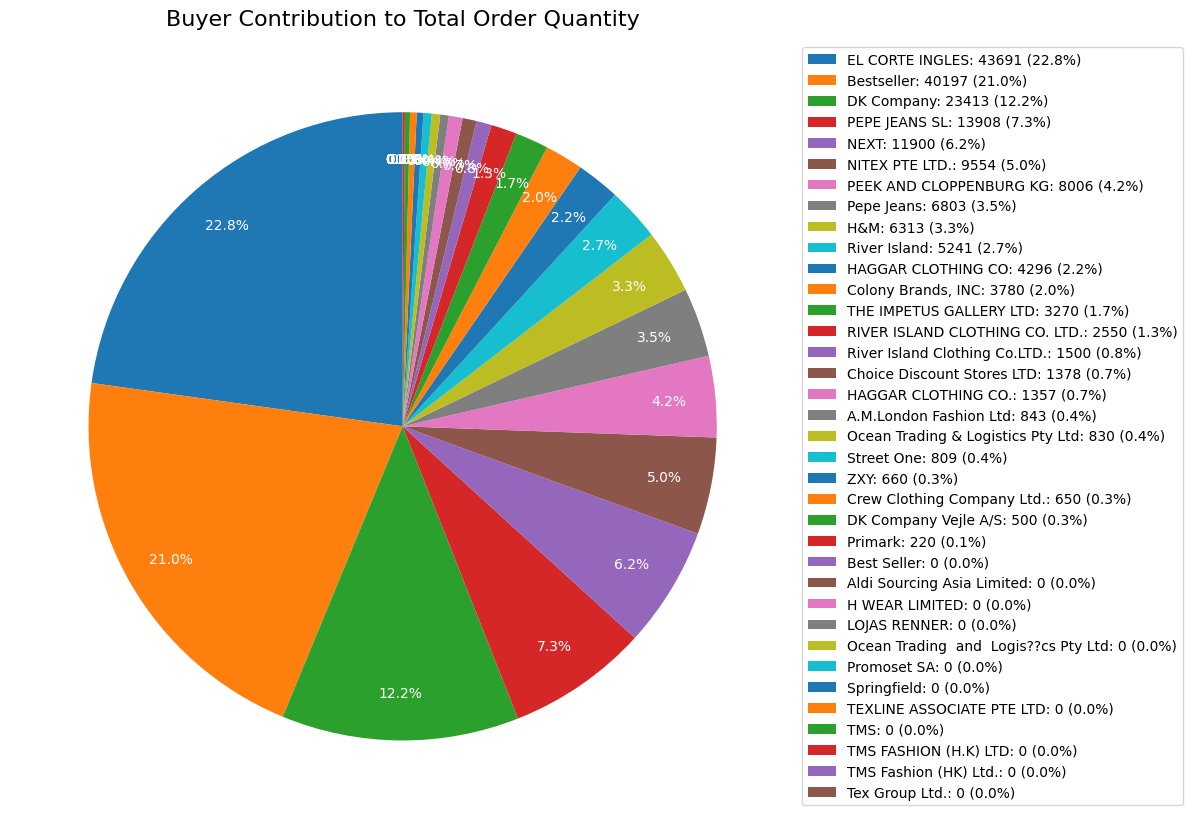

In [65]:

import matplotlib.pyplot as plt

# Assuming 'buyer_contribution' DataFrame is already created as in the original code

def plot_buyer_contribution_pie(buyer_contribution):
    """Plots a pie chart of buyer contribution to orders, with labels on the right."""
    plt.figure(figsize=(12, 12))  # Adjust figure size for better label placement

    # Order quantities for the pie chart
    order_quantities = buyer_contribution['Order_Qty']

    # Create the pie chart
    wedges, texts, autotexts = plt.pie(
        order_quantities,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85 # Adjust percentage label distance from the center
    )

    # Customize the percentage labels for better visibility
    for autotext in autotexts:
        autotext.set_color('white')  # Set text color for better contrast
        autotext.set_fontsize(10)    # Adjust label font size

    # Set the title
    plt.title('Buyer Contribution to Total Order Quantity', fontsize=16)


    # Create a legend with buyer names and percentages
    legend_labels = [f'{buyer}: {quantity:.0f} ({(quantity / order_quantities.sum()) * 100:.1f}%)'
                    for buyer, quantity in zip(buyer_contribution.index, order_quantities)]

    # Position the legend outside the pie chart with labels to the right
    plt.legend(wedges, legend_labels, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

    plt.tight_layout()
    plt.show()


# Call the function to plot the pie chart
plot_buyer_contribution_pie(buyer_contribution)


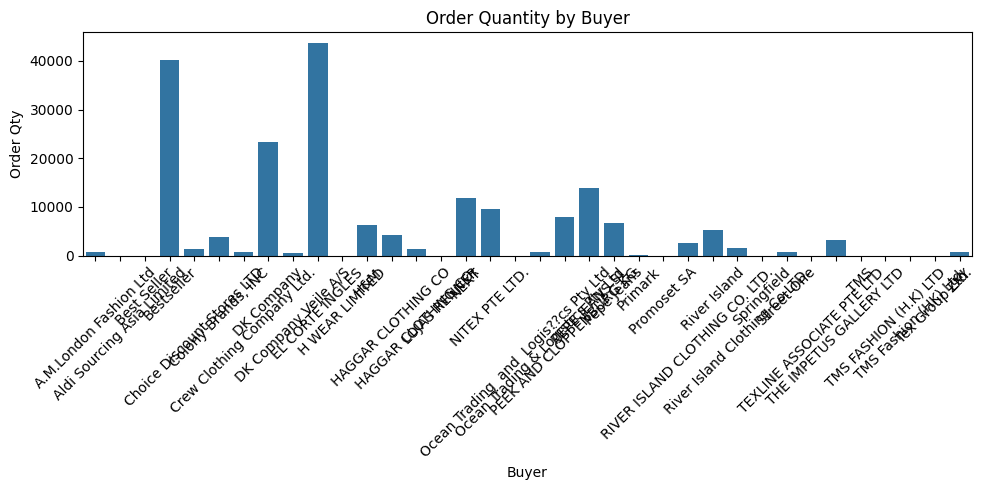

In [67]:
# 📌 6. Visualization Examples

# Buyer-wise Order Quantity
buyer_summary = df.groupby('Buyer')['Order_Qty'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=buyer_summary, x='Buyer', y='Order_Qty')
plt.title('Order Quantity by Buyer')
plt.ylabel('Order Qty')
plt.xlabel('Buyer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


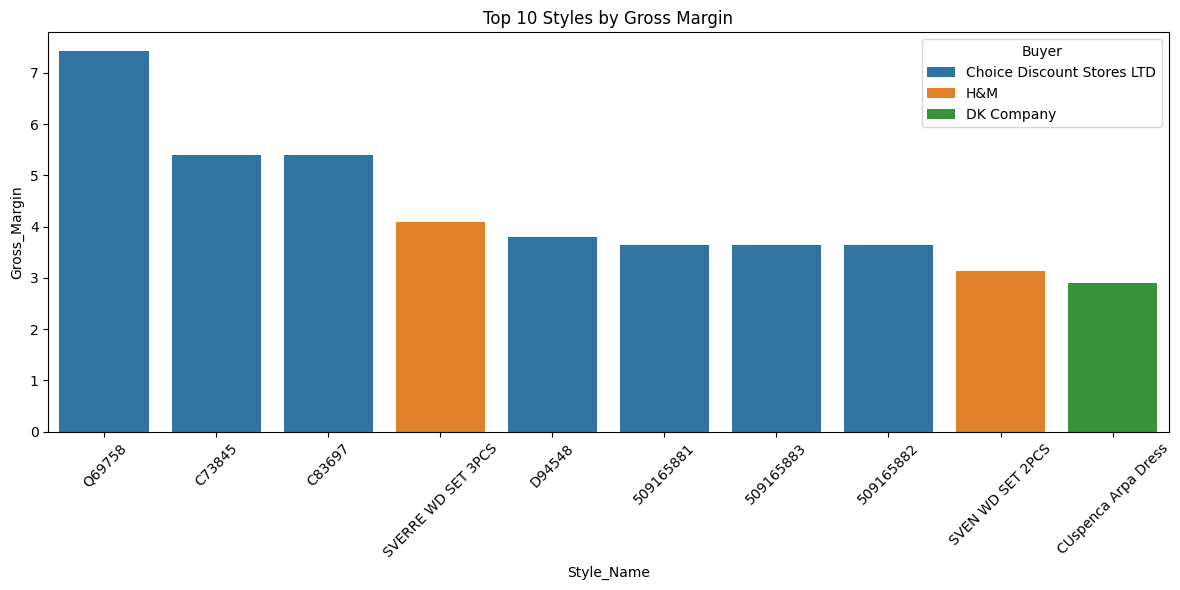

In [68]:
# Style-wise Gross Margin
plt.figure(figsize=(12, 6))
top_styles = df.sort_values(by='Gross_Margin', ascending=False).head(10)
sns.barplot(data=top_styles, x='Style_Name', y='Gross_Margin', hue='Buyer')
plt.title('Top 10 Styles by Gross Margin')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


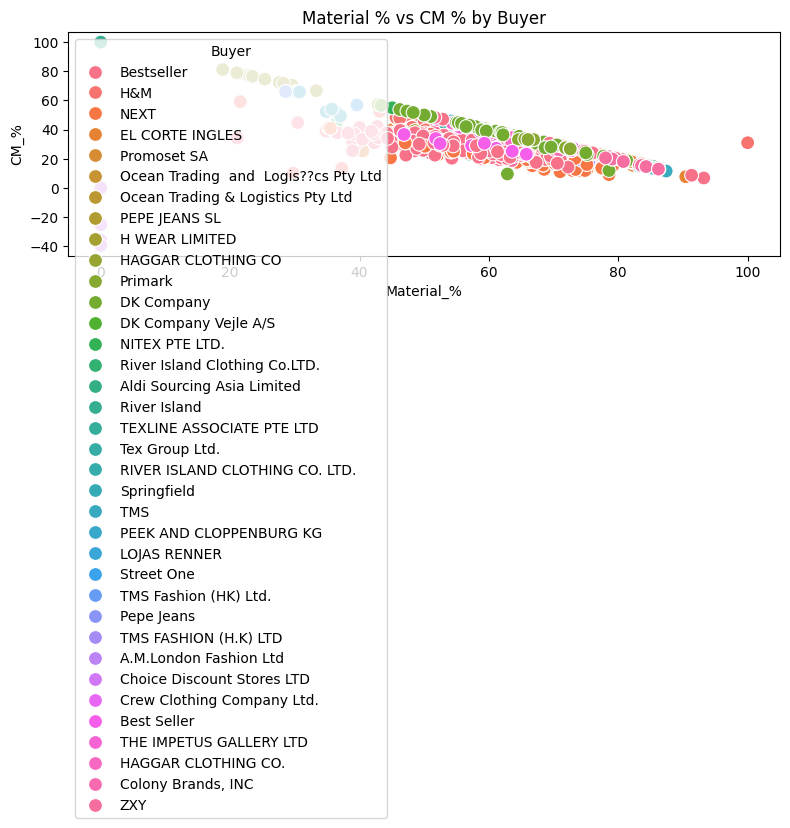

In [69]:
# Material % vs CM %
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Material_%', y='CM_%', hue='Buyer', s=100)
plt.title('Material % vs CM % by Buyer')
plt.tight_layout()
plt.show()


In [70]:
print(df.columns.tolist())


['Buyer', 'SC/LC_No', 'Style_Code', 'Style_Name', 'Season', 'Pcs/set', 'Order_Qty', 'FOB', 'CM', 'CM_%', 'SMV', 'EPM', 'CostPerMinute', 'Eficience', 'EficenceCPM', 'Fabric/Yarn_Cost', 'Trims_Cost', 'Material_Cost', 'Material_%', 'Other_Cost', 'Commercial_Cost', '%', 'Commission_Cost', '%.1', 'Merchandiser', 'Total_Cost', 'Gross_Margin', 'Material_Cost_Ratio', 'Other_Cost_Ratio', 'Commercial_Cost_Ratio', 'Commission_Cost_Ratio', 'Order_FOB_Interaction', 'Order_Qty_log', 'FOB_log', 'CM_log', 'Material_Cost_log', 'Other_Cost_log', 'Commercial_Cost_log', 'Commission_Cost_log', 'Gross_Margin_log', 'Cost_per_Unit', 'Order_Qty_Category']


## 📎 6. Business Insights

Impact of Order Quantity on Gross Margin:
Order_Qty_Category
Low          0.088594
Medium       0.431042
High         0.176233
Very High         NaN
Name: Gross_Margin, dtype: float64


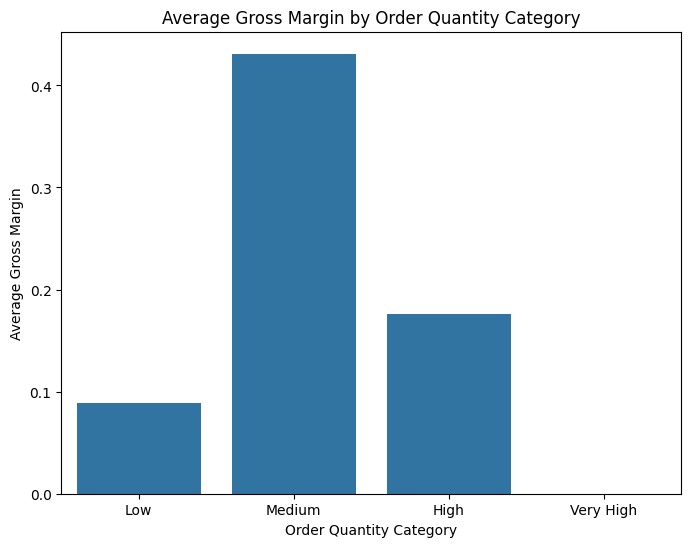


Top 5 Buyers by Total Gross Margin:
Buyer
NEXT                          89.03
Bestseller                    43.34
Choice Discount Stores LTD    32.96
H&M                           14.14
EL CORTE INGLES                9.96
Name: Gross_Margin, dtype: float64

Analysis for buyer NEXT:
       Pcs/set   Order_Qty         FOB          CM        CM_%         SMV  \
count    101.0  101.000000  101.000000  101.000000  101.000000  101.000000   
mean       1.0  117.821782   10.624950    2.009505   20.563168    1.336634   
std        0.0  240.269865    5.044574    0.995605    8.632242    5.470425   
min        1.0    0.000000    3.400000    0.890000    9.080000    0.000000   
25%        1.0    0.000000    6.180000    1.400000   13.480000    0.000000   
50%        1.0    0.000000    8.670000    1.900000   19.360000    0.000000   
75%        1.0    0.000000   15.850000    2.500000   24.900000    0.000000   
max        1.0  900.000000   19.950000    5.000000   41.370000   30.000000   

             

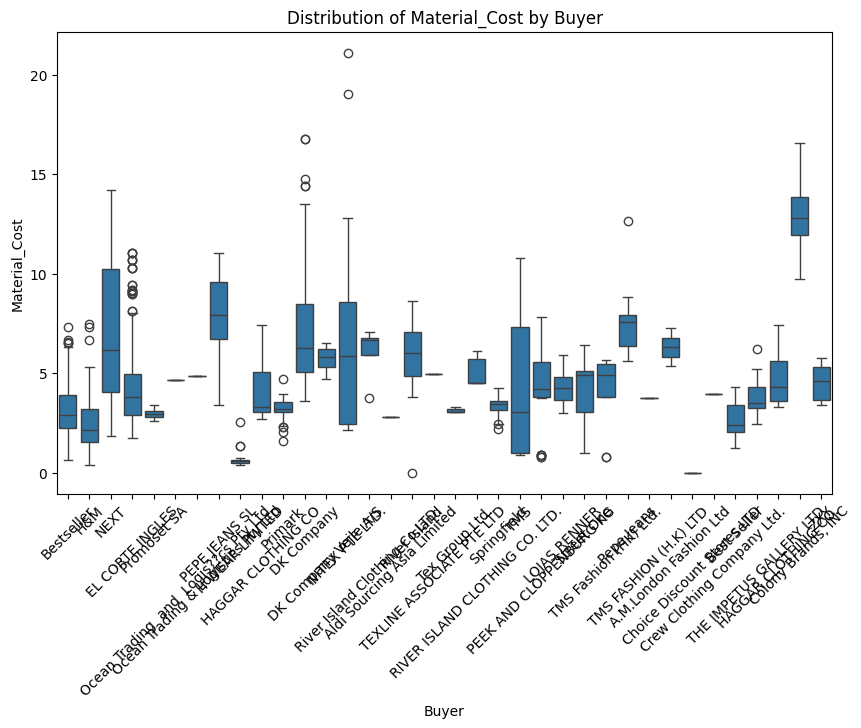

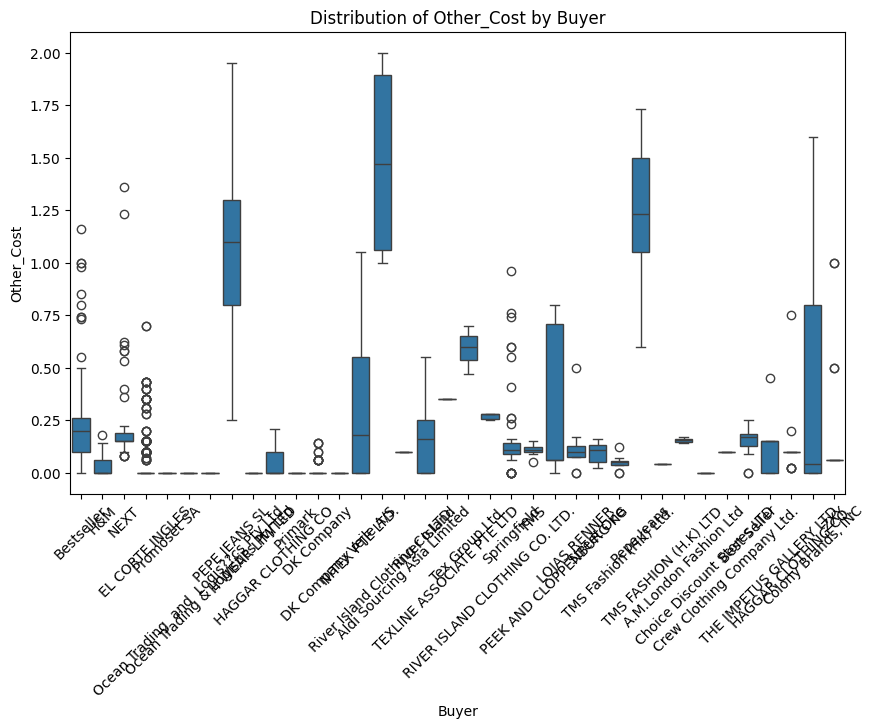

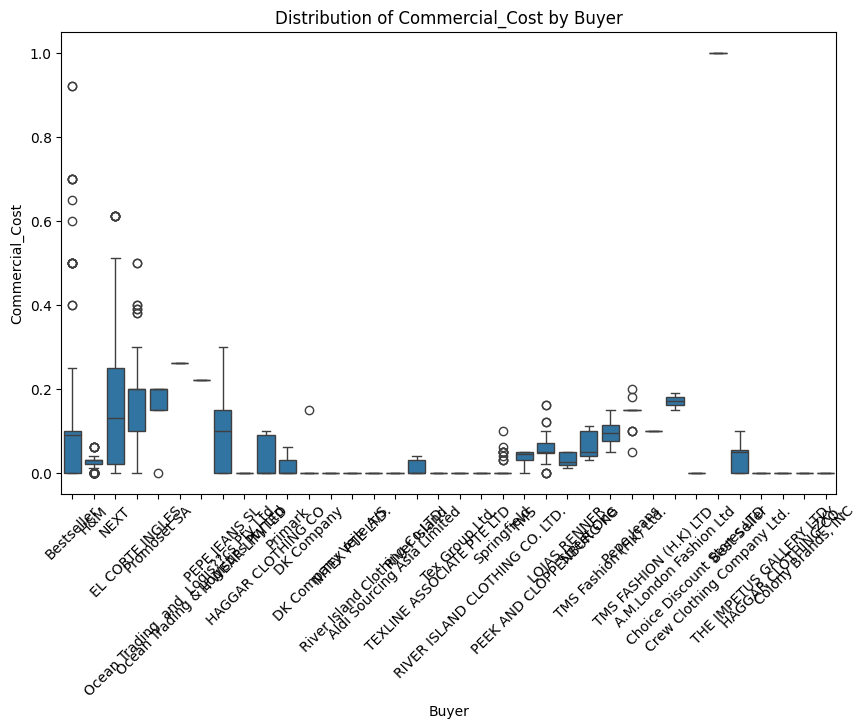

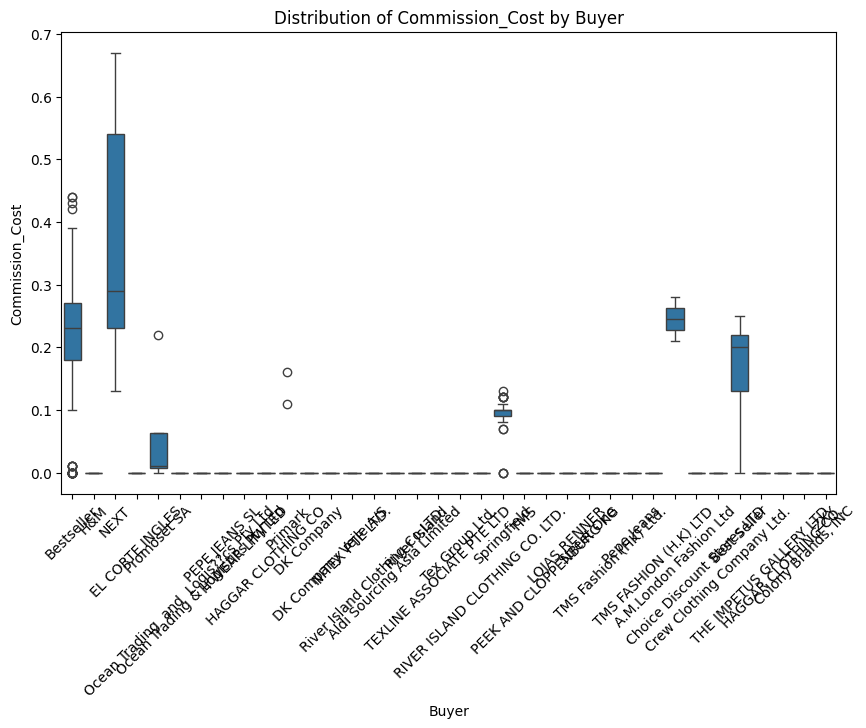

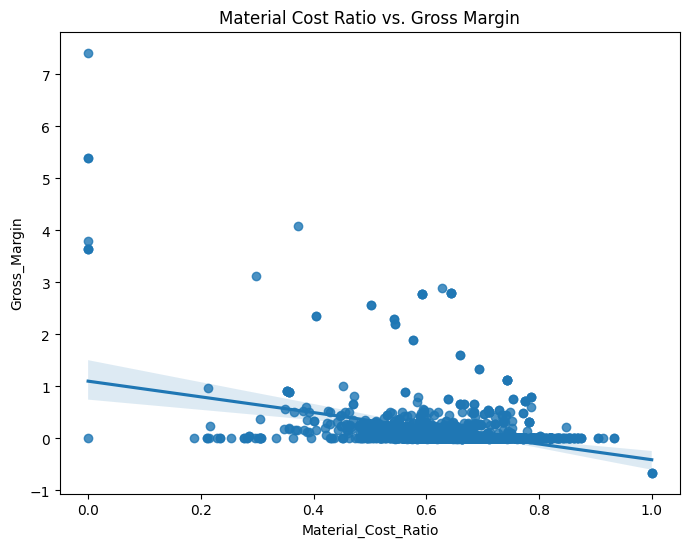


Correlation Matrix:
                     Order_Qty       FOB  Material_Cost_Ratio  Gross_Margin
Order_Qty             1.000000  0.207857            -0.049511      0.089511
FOB                   0.207857  1.000000             0.264819      0.235933
Material_Cost_Ratio  -0.049511  0.264819             1.000000     -0.385346
Gross_Margin          0.089511  0.235933            -0.385346      1.000000

Styles with the highest gross margins:
               Style_Name  Gross_Margin
1454               Q69758          7.42
1452               C83697          5.40
1455               C73845          5.40
982    SVERRE WD SET 3PCS          4.09
1453               D94548          3.79
1456            509165881          3.65
1457            509165882          3.65
1458            509165883          3.65
983      SVEN WD SET 2PCS          3.13
892   CUspenca Arpa Dress          2.90

Average gross margin by FOB segment:


FOB_Segment
Low          0.093145
Medium       0.092819
High         0.046946
Very High    0.233863
Name: Gross_Margin, dtype: float64

In [71]:
# Analyze the relationship between order quantity and gross margin
order_quantity_impact = df.groupby('Order_Qty_Category')['Gross_Margin'].mean()
print("Impact of Order Quantity on Gross Margin:")
print(order_quantity_impact)

# Visualize the relationship
plt.figure(figsize=(8, 6))
sns.barplot(x=order_quantity_impact.index, y=order_quantity_impact.values)
plt.title('Average Gross Margin by Order Quantity Category')
plt.xlabel('Order Quantity Category')
plt.ylabel('Average Gross Margin')
plt.show()


# Identify top-performing buyers based on gross margin
top_buyers_margin = df.groupby('Buyer')['Gross_Margin'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Buyers by Total Gross Margin:")
print(top_buyers_margin)

# Further analysis of top buyers
for buyer in top_buyers_margin.index:
  buyer_data = df[df['Buyer'] == buyer]
  print(f"\nAnalysis for buyer {buyer}:")
  print(buyer_data.describe())
  # Add more detailed analysis as per your requirements

# Investigate the distribution of cost components for different buyers
cost_components = ['Material_Cost', 'Other_Cost', 'Commercial_Cost', 'Commission_Cost']
for component in cost_components:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Buyer', y=component, data=df)
    plt.title(f'Distribution of {component} by Buyer')
    plt.xticks(rotation=45)
    plt.show()


# Analyze the impact of material cost ratio on gross margin
plt.figure(figsize=(8, 6))
sns.regplot(x='Material_Cost_Ratio', y='Gross_Margin', data=df)
plt.title('Material Cost Ratio vs. Gross Margin')
plt.show()

# Correlation analysis between key features and gross margin
correlation_matrix = df[['Order_Qty', 'FOB', 'Material_Cost_Ratio', 'Gross_Margin']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


# Example: Find the styles with the highest gross margins
highest_margin_styles = df.nlargest(10, 'Gross_Margin')
print("\nStyles with the highest gross margins:")
print(highest_margin_styles[['Style_Name', 'Gross_Margin']])


# Segment buyers based on their FOB values (example segmentation)
df['FOB_Segment'] = pd.qcut(df['FOB'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])  # Quantile-based segmentation
fob_segment_analysis = df.groupby('FOB_Segment')['Gross_Margin'].mean()
print("\nAverage gross margin by FOB segment:")
fob_segment_analysis




In [72]:
# 1. 🔍 Top Buyers by Order Quantity
top_buyers = df.groupby('Buyer')['Order_Qty'].sum().sort_values(ascending=False)
print("📌 Top Buyers by Total Order Quantity:")
display(top_buyers)

# 2. 💰 Styles with Highest FOB (selling price)
top_fob = df[['Style_Name', 'FOB']].sort_values(by='FOB', ascending=False).drop_duplicates()
print("📌 Top Styles by FOB:")
display(top_fob.head(5))

# 3. 🧵 Styles with Highest Material Cost %
top_material_percent = df[['Style_Name', 'Material_%']].sort_values(by='Material_%', ascending=False).drop_duplicates()
print("📌 Styles with Highest Material Cost %:")
display(top_material_percent.head(5))

# 4. 📉 Styles with Lowest Gross Margin (potential red flags)
lowest_margin = df[['Style_Name', 'FOB', 'Total_Cost', 'Gross_Margin']].sort_values(by='Gross_Margin').drop_duplicates()
print("📌 Styles with Lowest Gross Margin:")
display(lowest_margin.head(5))

# 5. 🧑‍💼 Merchandiser Performance Summary
merch_summary = df.groupby('Merchandiser').agg({
    'Order_Qty': 'sum',
    'Gross_Margin': 'mean',
    'FOB': 'mean'
}).sort_values(by='Order_Qty', ascending=False)

print("📌 Merchandiser Performance:")
display(merch_summary)

# 6. 🧮 Average CM% by Buyer
avg_cm_by_buyer = df.groupby('Buyer')['CM_%'].mean().sort_values(ascending=False)
print("📌 Average CM % by Buyer:")
display(avg_cm_by_buyer)

# 7. 💹 Margin Contribution by Buyer
buyer_margin = df.groupby('Buyer')['Gross_Margin'].sum().sort_values(ascending=False)
print("📌 Total Gross Margin Contribution by Buyer:")
display(buyer_margin)


📌 Top Buyers by Total Order Quantity:


Buyer
EL CORTE INGLES                          43691.0
Bestseller                               40197.0
DK Company                               23413.0
PEPE JEANS SL                            13908.0
NEXT                                     11900.0
NITEX PTE LTD.                            9554.0
PEEK AND CLOPPENBURG KG                   8006.0
Pepe Jeans                                6803.0
H&M                                       6313.0
River Island                              5241.0
HAGGAR CLOTHING CO                        4296.0
Colony Brands, INC                        3780.0
THE IMPETUS GALLERY LTD                   3270.0
RIVER ISLAND CLOTHING CO. LTD.            2550.0
River Island Clothing Co.LTD.             1500.0
Choice Discount Stores LTD                1378.0
HAGGAR CLOTHING CO.                       1357.0
A.M.London Fashion Ltd                     843.0
Ocean Trading & Logistics Pty Ltd          830.0
Street One                                 809.0
ZXY                                        660.0
Crew Clothing Company Ltd.                 650.0
DK Company Vejle A/S                       500.0
Primark                                    220.0
Best Seller                                  0.0
Aldi Sourcing Asia Limited                   0.0
H WEAR LIMITED                               0.0
LOJAS RENNER                                 0.0
Ocean Trading  and  Logis??cs Pty Ltd        0.0
Promoset SA                                  0.0
Springfield                                  0.0
TEXLINE ASSOCIATE PTE LTD                    0.0
TMS                                          0.0
TMS FASHION (H.K) LTD                        0.0
TMS Fashion (HK) Ltd.                        0.0
Tex Group Ltd.                               0.0
Name: Order_Qty, dtype: float64

📌 Top Styles by FOB:


Style_Name    FOB
1113  The Lucky Robe  30.06
1112  The Happy Robe  24.70
1728           A33VV  23.35
1727           A33VU  23.35
1729           A33VW  23.35

📌 Styles with Highest Material Cost %:


Style_Name  Material_%
1017  FRAME SLIM TD EASY IRON SHIRT      100.00
1734        PCPOPPY LS OXFORD LOOSE       93.22
1735        PCSULLE LS WRAP TOP WVN       91.34
347                    SS24 223-263       90.43
1339          WINNIE - LINEN/BW MIX       87.49

📌 Styles with Lowest Gross Margin:


Style_Name   FOB  Total_Cost  Gross_Margin
1017  FRAME SLIM TD EASY IRON SHIRT  2.15        2.81         -0.66
1684                  JACKM251|-012  5.80        5.81         -0.01
1739        PCSALMINA 2/4 DRESS WVN  9.00        9.01         -0.01
1116                              0  2.45        2.46         -0.01
806            PRINCETON S/S SHIRTS  2.14        2.15         -0.01

📌 Merchandiser Performance:


Order_Qty  Gross_Margin        FOB
Merchandiser                                    
Nooruddin       41521.0      0.008076   6.007959
Anwar           27655.0      0.551575   6.687603
Nipun           25664.0      0.088571   9.451270
Babu            21845.0     -0.000052   6.453927
Sourov          16580.0      0.035952   8.852024
Nazim           13680.0      0.014717   8.340566
Ratna            9157.0      0.003455   9.444909
Shohel           6758.0      0.062660   4.249894
Mahbub           5389.0      0.627143  10.418095
Hossain          4884.0      0.216786   5.698214
AKZilani         4456.0      0.956190   5.472619
Prince           3546.0      0.073281   4.852500
Fakrul           3239.0      0.007262   4.260833
Rajon            2608.0      0.029744   6.800769
Sabbir           2424.0      0.140000   4.643333
Asaduzzaman      1455.0      0.296364   5.069091
Kuasha            630.0      0.371304   8.732174
Alamgir           178.0      0.392727   4.621818
0                   0.0      0.000000   5.030000
Ema                 0.0      0.120000   2.574286
Mohsin              0.0      2.350000   7.900000
Zaman               0.0      0.068491   5.029057

📌 Average CM % by Buyer:


Buyer
H WEAR LIMITED                           70.498235
TMS Fashion (HK) Ltd.                    36.773750
Tex Group Ltd.                           36.696667
THE IMPETUS GALLERY LTD                  36.007857
River Island                             35.733810
TMS                                      34.258333
H&M                                      33.756492
HAGGAR CLOTHING CO.                      33.695385
DK Company Vejle A/S                     33.665000
Promoset SA                              33.167500
PEEK AND CLOPPENBURG KG                  32.416250
River Island Clothing Co.LTD.            32.395000
Street One                               31.686667
TMS FASHION (H.K) LTD                    31.600000
DK Company                               30.765714
Colony Brands, INC                       30.198333
Aldi Sourcing Asia Limited               29.920000
Best Seller                              29.318182
HAGGAR CLOTHING CO                       28.659600
NITEX PTE LTD.                           28.567000
EL CORTE INGLES                          28.527896
Pepe Jeans                               28.434118
Bestseller                               28.355071
Crew Clothing Company Ltd.               27.380000
Primark                                  27.263333
Springfield                              26.292075
RIVER ISLAND CLOTHING CO. LTD.           26.130000
Ocean Trading  and  Logis??cs Pty Ltd    26.090000
PEPE JEANS SL                            25.970877
TEXLINE ASSOCIATE PTE LTD                25.870000
Ocean Trading & Logistics Pty Ltd        23.880000
NEXT                                     20.563168
LOJAS RENNER                             19.793750
A.M.London Fashion Ltd                   18.345000
ZXY                                      17.182941
Choice Discount Stores LTD              -17.984286
Name: CM_%, dtype: float64

📌 Total Gross Margin Contribution by Buyer:


Buyer
NEXT                                     8.903000e+01
Bestseller                               4.334000e+01
Choice Discount Stores LTD               3.296000e+01
H&M                                      1.414000e+01
EL CORTE INGLES                          9.960000e+00
PEPE JEANS SL                            8.790000e+00
HAGGAR CLOTHING CO                       4.690000e+00
DK Company                               4.690000e+00
Springfield                              3.630000e+00
Pepe Jeans                               2.400000e+00
Best Seller                              9.900000e-01
TMS                                      8.800000e-01
TMS Fashion (HK) Ltd.                    8.300000e-01
Crew Clothing Company Ltd.               2.600000e-01
THE IMPETUS GALLERY LTD                  2.200000e-01
ZXY                                      2.000000e-01
Promoset SA                              1.900000e-01
Street One                               1.000000e-01
Primark                                  7.000000e-02
Ocean Trading  and  Logis??cs Pty Ltd    5.000000e-02
River Island                             8.881784e-15
Colony Brands, INC                       7.105427e-15
RIVER ISLAND CLOTHING CO. LTD.           3.552714e-15
River Island Clothing Co.LTD.            1.776357e-15
LOJAS RENNER                             1.776357e-15
Aldi Sourcing Asia Limited               8.881784e-16
Tex Group Ltd.                           8.881784e-16
TMS FASHION (H.K) LTD                    8.881784e-16
H WEAR LIMITED                           6.661338e-16
Ocean Trading & Logistics Pty Ltd        0.000000e+00
TEXLINE ASSOCIATE PTE LTD                0.000000e+00
PEEK AND CLOPPENBURG KG                 -8.881784e-16
DK Company Vejle A/S                    -1.776357e-15
NITEX PTE LTD.                          -3.108624e-15
A.M.London Fashion Ltd                  -1.000000e-02
HAGGAR CLOTHING CO.                     -3.000000e-02
Name: Gross_Margin, dtype: float64

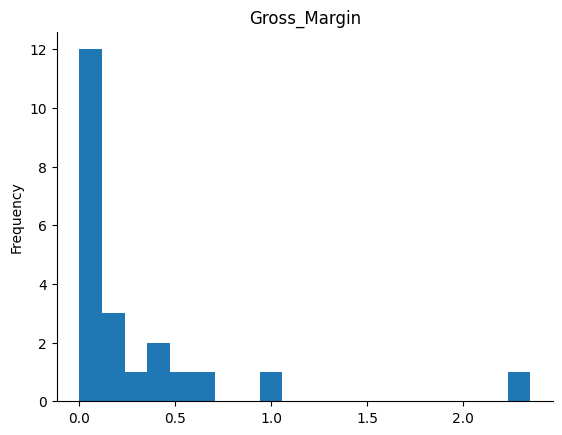

In [73]:
# @title Gross_Margin

from matplotlib import pyplot as plt
merch_summary['Gross_Margin'].plot(kind='hist', bins=20, title='Gross_Margin')
plt.gca().spines[['top', 'right',]].set_visible(False)